# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
# Step 0: Load The Data

In [1]:
# Visualizations will be shown in the notebook.
%matplotlib inline
from importlib import reload
import utils; reload(utils)
from utils import *

In [2]:
# Import crucial modules
import pickle
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
import time

In [3]:
datasets_path = "../datasets/german_traffic_signs/"
models_path = "./models/"

training_file = datasets_path + 'train.p'
validation_file= datasets_path + 'valid.p'
testing_file = datasets_path + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

# Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

## Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
# Let's get some dimensions
print("Features shape: ", X_train.shape)
print("Leatures shape: ", y_train.shape)

Features shape:  (34799, 32, 32, 3)
Leatures shape:  (34799,)


In [5]:
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Group the images by class

We leverage on the pandas module to group the images by label. Our first step is to import the signnames.csv file which contains English description of the labels.

In [6]:
# Load sign names file
sign_names = pd.read_csv("signnames.csv")
sign_names.set_index("ClassId")

sign_names.head(n=3)

ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)

#### Group Images In Training set

In [7]:
X_train_id_to_label = group_img_id_to_lbl(y_train, sign_names)

# Let's print a few of those mappings now
X_train_id_to_label.head(n=3)

img_id  label_id         label_name
0       0        41  End of no passing
1       1        41  End of no passing
2       2        41  End of no passing

In [8]:
# We should group by label id to understand the distribution
X_train_group_by_label_count = group_img_id_to_lb_count(X_train_id_to_label)
X_train_group_by_label_count.head(n=5)

img_id
label_id label_name                  
0        Speed limit (20km/h)     180
1        Speed limit (30km/h)    1980
2        Speed limit (50km/h)    2010
3        Speed limit (60km/h)    1260
4        Speed limit (70km/h)    1770

We can already witness siginificant data imbalance across the classes in the training. For instance class 0 has less than 200 images, while class 2 has over 2000 images. Let's plot the number of images against the class to better understand visually where we stand.

#### Training Set Distribution Visualization

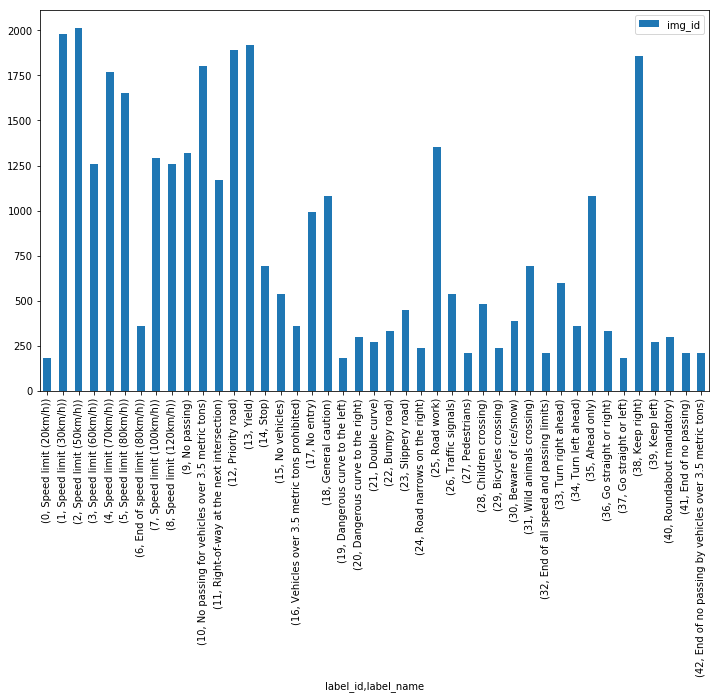

In [9]:
# Now count the number of images for each class and plot the results so that we understand the distribution
X_train_group_by_label_count.plot(kind='bar', figsize=(12, 7))

This confirms the significant class imbalance we observed earlier. At this stage we will not attempt to address it.

#### Training Set Image Visualization

[0] : Speed limit (20km/h)


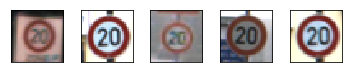

[1] : Speed limit (30km/h)


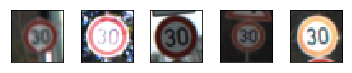

[2] : Speed limit (50km/h)


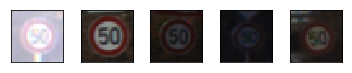

[3] : Speed limit (60km/h)


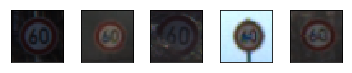

[4] : Speed limit (70km/h)


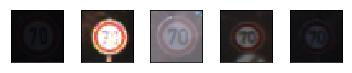

[5] : Speed limit (80km/h)


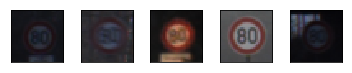

[6] : End of speed limit (80km/h)


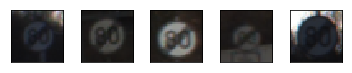

[7] : Speed limit (100km/h)


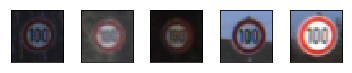

[8] : Speed limit (120km/h)


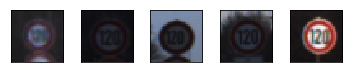

[9] : No passing


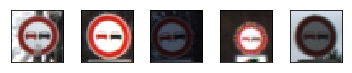

[10] : No passing for vehicles over 3.5 metric tons


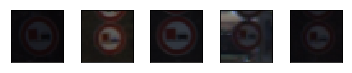

[11] : Right-of-way at the next intersection


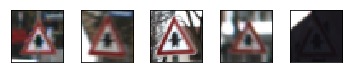

[12] : Priority road


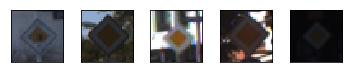

[13] : Yield


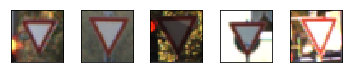

[14] : Stop


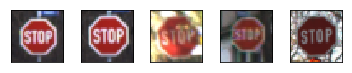

[15] : No vehicles


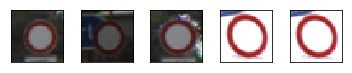

[16] : Vehicles over 3.5 metric tons prohibited


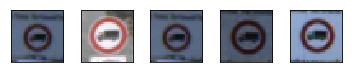

[17] : No entry


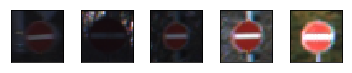

[18] : General caution


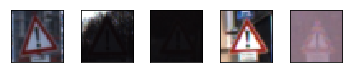

[19] : Dangerous curve to the left


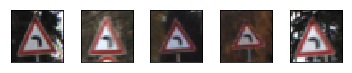

[20] : Dangerous curve to the right


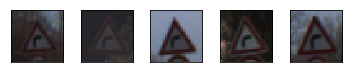

[21] : Double curve


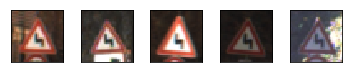

[22] : Bumpy road


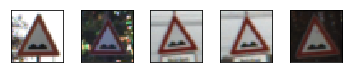

[23] : Slippery road


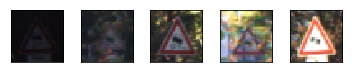

[24] : Road narrows on the right


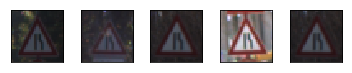

[25] : Road work


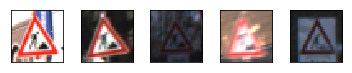

[26] : Traffic signals


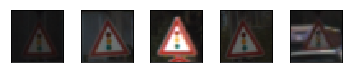

[27] : Pedestrians


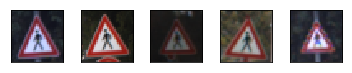

[28] : Children crossing


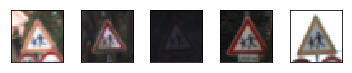

[29] : Bicycles crossing


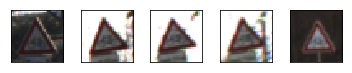

[30] : Beware of ice/snow


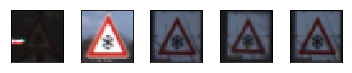

[31] : Wild animals crossing


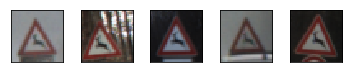

[32] : End of all speed and passing limits


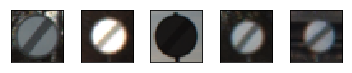

[33] : Turn right ahead


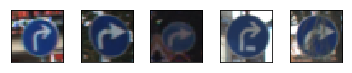

[34] : Turn left ahead


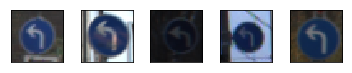

[35] : Ahead only


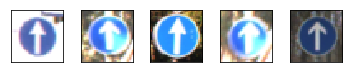

[36] : Go straight or right


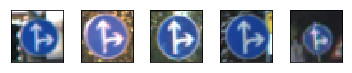

[37] : Go straight or left


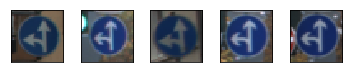

[38] : Keep right


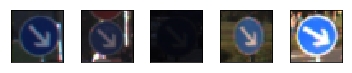

[39] : Keep left


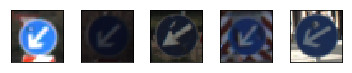

[40] : Roundabout mandatory


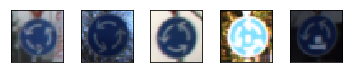

[41] : End of no passing


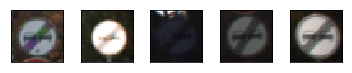

[42] : End of no passing by vehicles over 3.5 metric tons


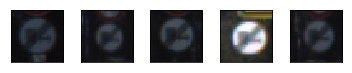

In [10]:
# Let's plot images from each of these classes
X_train_group_by_label = X_train_id_to_label.groupby(["label_id", "label_name"])
img_per_class = 5

show_random_dataset_images(X_train_group_by_label, X_train)    

#### Group Images In Validation Set

In [11]:
# Create a data frame whereby we index image id  with label
X_valid_id_to_label = group_img_id_to_lbl(y_valid, sign_names)

# Let's print a few of those mappings now
X_valid_id_to_label.head(n=3)

img_id  label_id         label_name
0       0        41  End of no passing
1       1        41  End of no passing
2       2        41  End of no passing

In [12]:
# We should group by label id to understand the distribution
X_valid_group_by_label_count = group_img_id_to_lb_count(X_valid_id_to_label)
X_valid_group_by_label_count.head(n=3)

img_id
label_id label_name                  
0        Speed limit (20km/h)      30
1        Speed limit (30km/h)     240
2        Speed limit (50km/h)     240

#### Validation Set Distribution Visualization

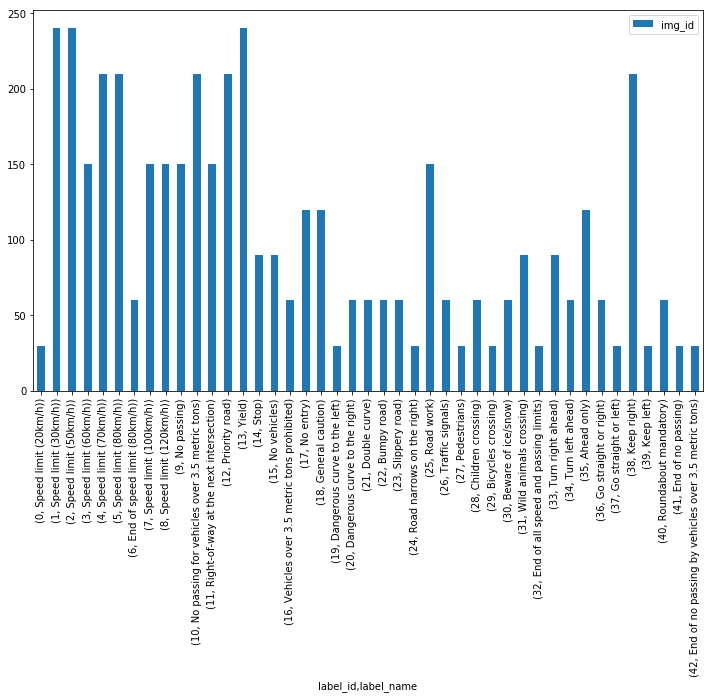

In [13]:
# Now count the number of images for each class and plot the results so that we understand the distribution
X_valid_group_by_label_count.plot(kind='bar', figsize=(12, 7))

We also observe significant imbalance in the validation set. This is honestly less of a problem as we do not train our data on it.

#### Validation Set Images Visualization

[0] : Speed limit (20km/h)


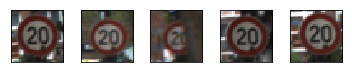

[1] : Speed limit (30km/h)


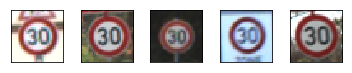

[2] : Speed limit (50km/h)


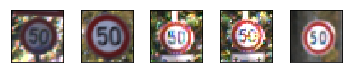

[3] : Speed limit (60km/h)


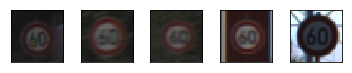

[4] : Speed limit (70km/h)


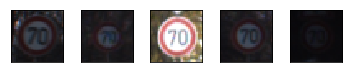

[5] : Speed limit (80km/h)


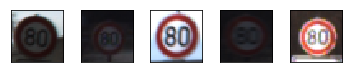

[6] : End of speed limit (80km/h)


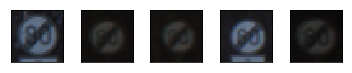

[7] : Speed limit (100km/h)


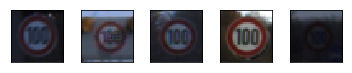

[8] : Speed limit (120km/h)


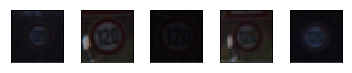

[9] : No passing


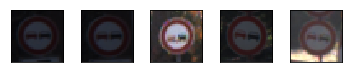

[10] : No passing for vehicles over 3.5 metric tons


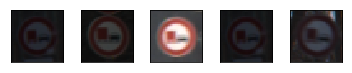

[11] : Right-of-way at the next intersection


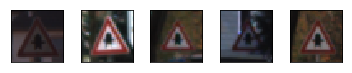

[12] : Priority road


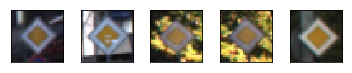

[13] : Yield


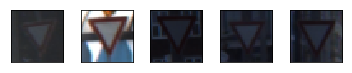

[14] : Stop


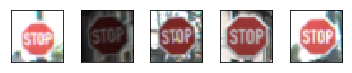

[15] : No vehicles


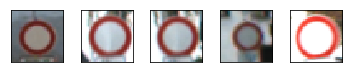

[16] : Vehicles over 3.5 metric tons prohibited


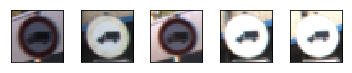

[17] : No entry


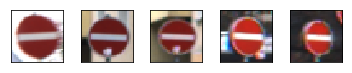

[18] : General caution


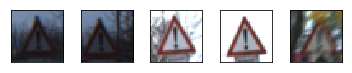

[19] : Dangerous curve to the left


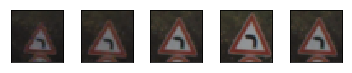

[20] : Dangerous curve to the right


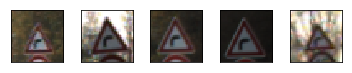

[21] : Double curve


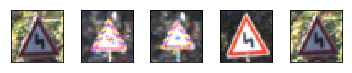

[22] : Bumpy road


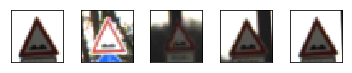

[23] : Slippery road


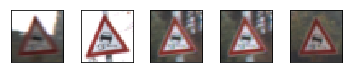

[24] : Road narrows on the right


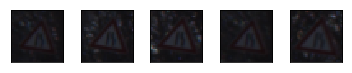

[25] : Road work


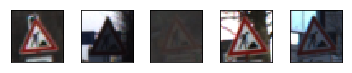

[26] : Traffic signals


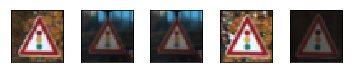

[27] : Pedestrians


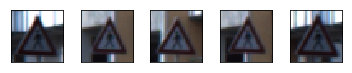

[28] : Children crossing


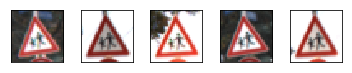

[29] : Bicycles crossing


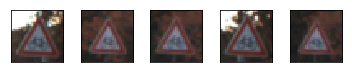

[30] : Beware of ice/snow


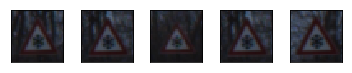

[31] : Wild animals crossing


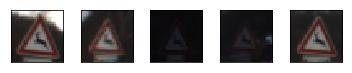

[32] : End of all speed and passing limits


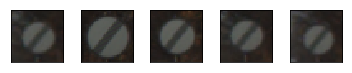

[33] : Turn right ahead


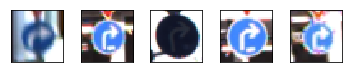

[34] : Turn left ahead


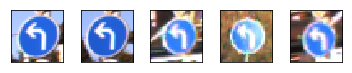

[35] : Ahead only


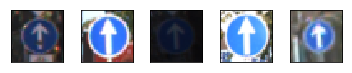

[36] : Go straight or right


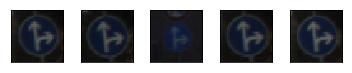

[37] : Go straight or left


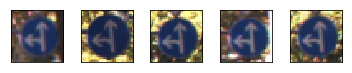

[38] : Keep right


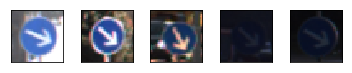

[39] : Keep left


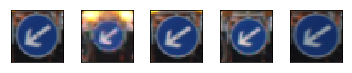

[40] : Roundabout mandatory


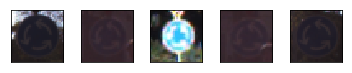

[41] : End of no passing


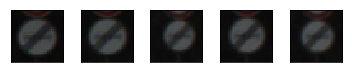

[42] : End of no passing by vehicles over 3.5 metric tons


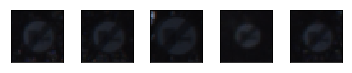

In [14]:
# Let's plot images from each of these classes
X_valid_group_by_label = X_valid_id_to_label.groupby(["label_id", "label_name"])

show_random_dataset_images(X_valid_group_by_label, X_valid)

The validation set seems to suffer from the same problems as the training set, where some images are extremely dark.

### Create a sample set

As we have over 30 thousand images, we do not want to try every model on the whole dataset as this would be extremely time consuming. Instead, we create _sample_ datasets for training and validation, where we copy a percentage P of both dataset.

In [27]:
X_sample_train, y_sample_train = create_sample_set(X_train_group_by_label, X_train, y_train, pct=0.3)
print("Sample training images dimensions={0}, labels dimensions={1}".format(X_sample_train.shape, y_sample_train.shape))

X_sample_valid, y_sample_valid = create_sample_set(X_valid_group_by_label, X_valid, y_valid, pct=0.3)
print("Sample validation images dimensions={0}, labels dimensions={1}".format(X_sample_valid.shape, y_sample_valid.shape))

Sample training images dimensions=(10439, 32, 32, 3), labels dimensions=(10439,)
Sample validation images dimensions=(1323, 32, 32, 3), labels dimensions=(1323,)


We can see that some images are very dark, and we should therefore look at applying a pre-processing step to brighten them if possible.

----

# Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

## Data Pre-Processing

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Normalisation

In [15]:
# Normalise training set
X_train_normalised = normalise_images(X_train, X_train)

In [16]:
# Do the same for training and validation sets, using mean and standard deviation of training set
X_valid_normalised = normalise_images(X_valid, X_train) 
X_test_normalised = normalise_images(X_test, X_train) 

[0] : Speed limit (20km/h)


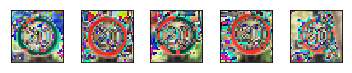

[1] : Speed limit (30km/h)


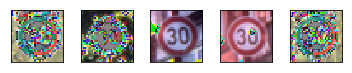

[2] : Speed limit (50km/h)


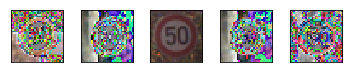

[3] : Speed limit (60km/h)


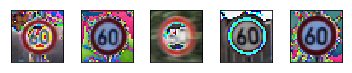

[4] : Speed limit (70km/h)


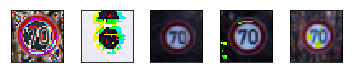

[5] : Speed limit (80km/h)


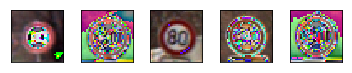

[6] : End of speed limit (80km/h)


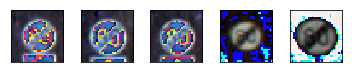

[7] : Speed limit (100km/h)


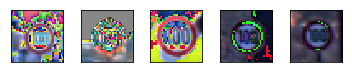

[8] : Speed limit (120km/h)


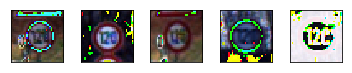

[9] : No passing


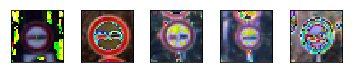

[10] : No passing for vehicles over 3.5 metric tons


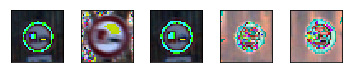

[11] : Right-of-way at the next intersection


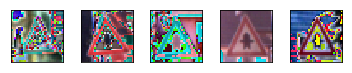

[12] : Priority road


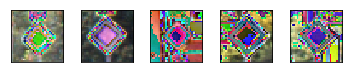

[13] : Yield


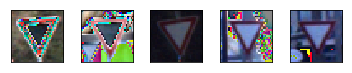

[14] : Stop


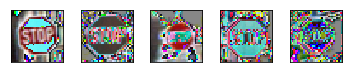

[15] : No vehicles


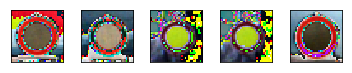

[16] : Vehicles over 3.5 metric tons prohibited


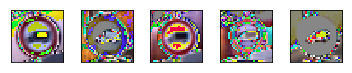

[17] : No entry


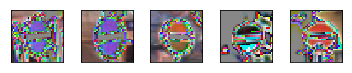

[18] : General caution


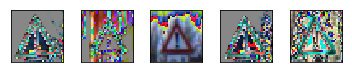

[19] : Dangerous curve to the left


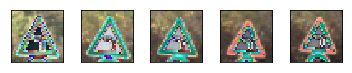

[20] : Dangerous curve to the right


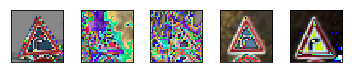

[21] : Double curve


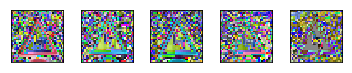

[22] : Bumpy road


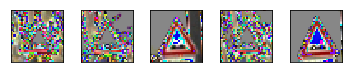

[23] : Slippery road


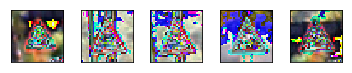

[24] : Road narrows on the right


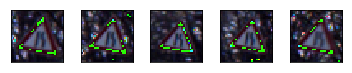

[25] : Road work


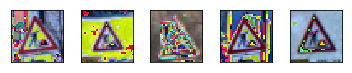

[26] : Traffic signals


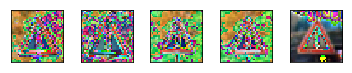

[27] : Pedestrians


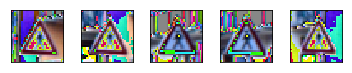

[28] : Children crossing


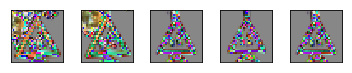

[29] : Bicycles crossing


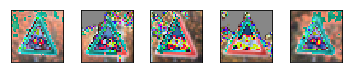

[30] : Beware of ice/snow


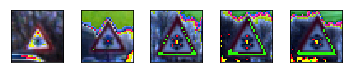

[31] : Wild animals crossing


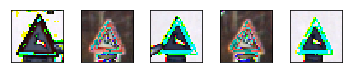

[32] : End of all speed and passing limits


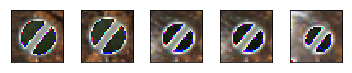

[33] : Turn right ahead


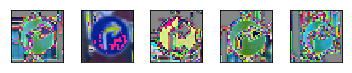

[34] : Turn left ahead


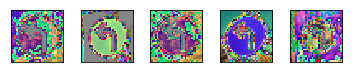

[35] : Ahead only


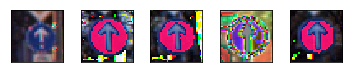

[36] : Go straight or right


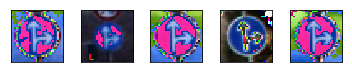

[37] : Go straight or left


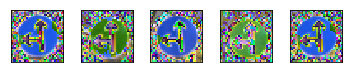

[38] : Keep right


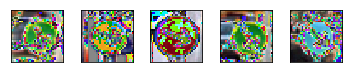

[39] : Keep left


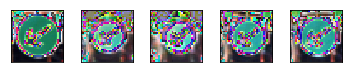

[40] : Roundabout mandatory


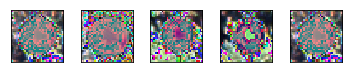

[41] : End of no passing


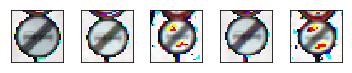

[42] : End of no passing by vehicles over 3.5 metric tons


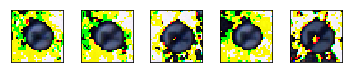

In [17]:
show_random_dataset_images(X_valid_group_by_label, X_valid_normalised)

### Grayscale

[0] : Speed limit (20km/h)


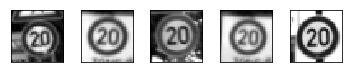

[1] : Speed limit (30km/h)


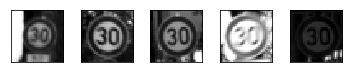

[2] : Speed limit (50km/h)


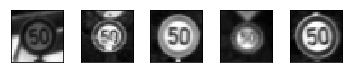

[3] : Speed limit (60km/h)


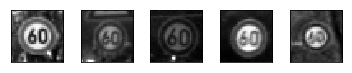

[4] : Speed limit (70km/h)


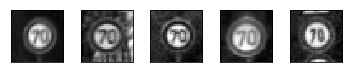

[5] : Speed limit (80km/h)


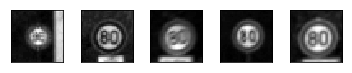

[6] : End of speed limit (80km/h)


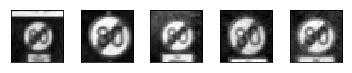

[7] : Speed limit (100km/h)


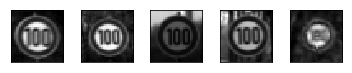

[8] : Speed limit (120km/h)


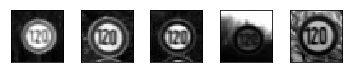

[9] : No passing


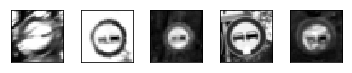

[10] : No passing for vehicles over 3.5 metric tons


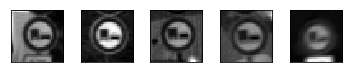

[11] : Right-of-way at the next intersection


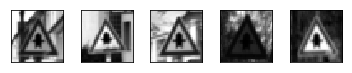

[12] : Priority road


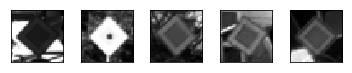

[13] : Yield


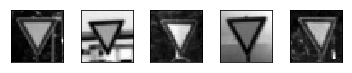

[14] : Stop


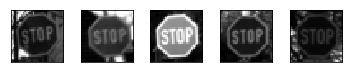

[15] : No vehicles


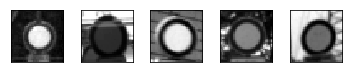

[16] : Vehicles over 3.5 metric tons prohibited


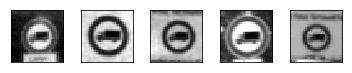

[17] : No entry


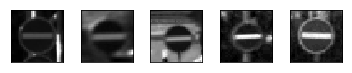

[18] : General caution


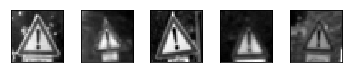

[19] : Dangerous curve to the left


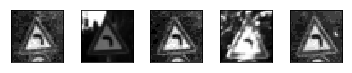

[20] : Dangerous curve to the right


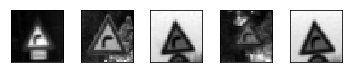

[21] : Double curve


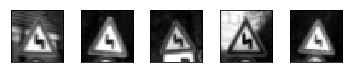

[22] : Bumpy road


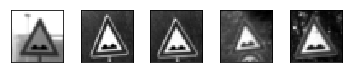

[23] : Slippery road


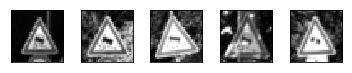

[24] : Road narrows on the right


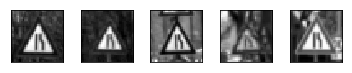

[25] : Road work


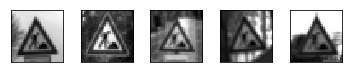

[26] : Traffic signals


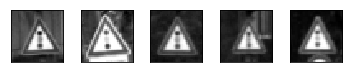

[27] : Pedestrians


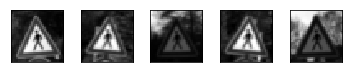

[28] : Children crossing


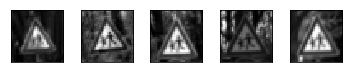

[29] : Bicycles crossing


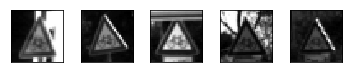

[30] : Beware of ice/snow


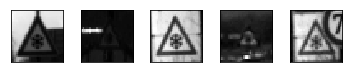

[31] : Wild animals crossing


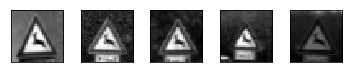

[32] : End of all speed and passing limits


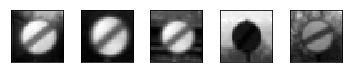

[33] : Turn right ahead


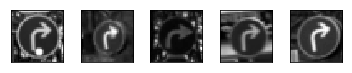

[34] : Turn left ahead


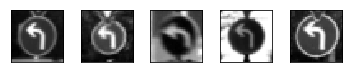

[35] : Ahead only


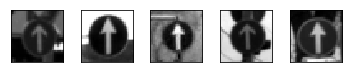

[36] : Go straight or right


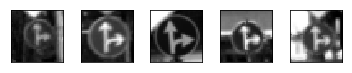

[37] : Go straight or left


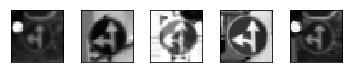

[38] : Keep right


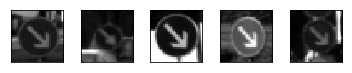

[39] : Keep left


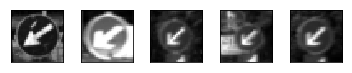

[40] : Roundabout mandatory


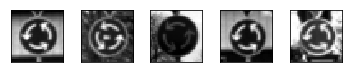

[41] : End of no passing


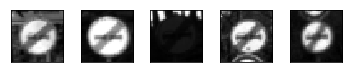

[42] : End of no passing by vehicles over 3.5 metric tons


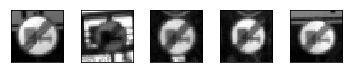

In [18]:
# Let's test our image graying features on training set
X_train_grayscale = np.asarray(list(map(lambda img: to_grayscale(img), X_train))) 
show_random_dataset_images(X_train_group_by_label, X_train_grayscale)

We can see that grayscaling somewhat improves the visibility of the images, but some of them still remain very dark. At this stage we will not address this problem.

In [19]:
# Do the same on validation set
X_valid_grayscale = np.asarray(list(map(lambda img: to_grayscale(img), X_valid))) 
#show_random_dataset_images(X_valid_group_by_label, X_valid_grayscale)

In [20]:
# Also grayscale test data
X_test_grayscale = np.asarray(list(map(lambda img: to_grayscale(img), X_test))) 
#show_image_list(X_test_grayscale[10:13], y_test[10:13], "Gray image", cols=3, fig_size=(3, 3), show_ticks=False)

## Model Architectures

In this section, we will define multiple neural network architectures, which progressively become more complex.

#### EdLeNet

We implement simple variant LeNet by Yann Le Cun, comically named *EdLeNet*

### Configuration and Execution Pipeline

We define the steps necessary to build a training pipeline in Tensorflow. These are defined as classes to increase flexibility.

In [21]:
class ModelConfig:
    """
    ModelConfig is a utility class that stores important configuration option about our model
    """

    def __init__(self, model, name, input_img_dimensions, conv_layers_config, fc_output_dims, output_classes, dropout_keep_pct):
        self.model = model
        self.name=name
        self.input_img_dimensions = input_img_dimensions
        
        # Determines the wxh dimension of filters, the starting depth (increases by x2 at every layer) 
        # and how many convolutional layers the network has
        self.conv_filter_size = conv_layers_config[0]
        self.conv_depth_start = conv_layers_config[1]
        self.conv_layers_count = conv_layers_config[2]


        self.fc_output_dims = fc_output_dims 
        self.output_classes = output_classes

        # Try with different values for drop out at convolutional and fully connected layers
        self.dropout_conv_keep_pct = dropout_keep_pct[0]
        self.dropout_fc_keep_pct = dropout_keep_pct[1]

In [22]:
class ModelExecutor:
    """
    ModelExecutor is responsible for executing the supplied model
    """
    def __init__(self, model_config, learning_rate=0.001):
        self.model_config = model_config
        self.learning_rate = learning_rate

        # Create Model operations
        self.create_model_operations()
        
        # Create a saver to persist the results of execution
        self.saver = tf.train.Saver()
    
    def create_placeholders(self):
        """
        Defining our placeholder variables:
            - x, y
            - one_hot_y
            - dropout placeholder
        """
        
        # e.g. 32 * 32 * 3
        input_dims = self.model_config.input_img_dimensions
        self.x = tf.placeholder(tf.float32, (None, input_dims[0], input_dims[1], input_dims[2]))
        self.y = tf.placeholder(tf.int32, (None))
        self.one_hot_y = tf.one_hot(self.y, self.model_config.output_classes)
        
        self.dropout_placeholder_conv = tf.placeholder(tf.float32)
        self.dropout_placeholder_fc = tf.placeholder(tf.float32)

    
    def create_model_operations(self):
        """
        Sets up all operations needed to execute run deep learning pipeline
        """
        
        # First step is to set our x, y, etc
        self.create_placeholders()
        
        cnn = self.model_config.model
        
        # Build the network -  TODO: pass the configuration in the future
        self.logits = cnn(self.x, self.model_config, self.dropout_placeholder_conv, self.dropout_placeholder_fc)
        # Obviously, using softmax as the activation function for final layer
        self.cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=self.one_hot_y, logits=self.logits)
        # Combined all the losses across batches
        self.loss_operation = tf.reduce_mean(self.cross_entropy)
        # What method do we use to reduce our loss?
        self.optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate)
        # What do we really do in a training operation then? Answer: we attempt to reduce the loss using our chosen optimizer
        self.training_operation = self.optimizer.minimize(self.loss_operation)

        # Get the top prediction for model against labels and check whether they match
        self.correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.one_hot_y, 1))
        # Compute accuracy at batch level
        self.accuracy_operation = tf.reduce_mean(tf.cast(self.correct_prediction, tf.float32))

        # compute what the prediction would be, when we don't have matching label
        self.prediction = tf.argmax(self.logits, 1)
        # Registering our top 5 predictions
        self.top5_predictions = tf.nn.top_k(tf.nn.softmax(self.logits), k=5, sorted=True, name=None)

        
    def evaluate_model(self, X_data, Y_data, batch_size):
        """
        Evaluates the model's accuracy and loss for the supplied dataset. 
        Naturally, Dropout is ignored in this case (i.e. we set dropout_keep_pct to 1.0)
        """
        
        num_examples = len(X_data)
        total_accuracy = 0.0
        total_loss = 0.0
        sess = tf.get_default_session()

        for offset in range(0, num_examples, batch_size):
            batch_x, batch_y = X_data[offset:offset+batch_size], Y_data[offset:offset+batch_size]
            
            # Compute both accuracy and loss for this batch
            accuracy = sess.run(self.accuracy_operation, 
                                feed_dict={
                                    self.dropout_placeholder_conv: 1.0,
                                    self.dropout_placeholder_fc: 1.0,
                                    self.x: batch_x, 
                                    self.y: batch_y
                                           })
            loss = sess.run(self.loss_operation, feed_dict={
                                    self.dropout_placeholder_conv: 1.0,
                                    self.dropout_placeholder_fc: 1.0,
                                    self.x: batch_x, 
                                    self.y: batch_y
                                           })

            # Weighting accuracy by the total number of elements in batch
            total_accuracy += (accuracy * len(batch_x))        
            total_loss += (loss * len(batch_x))
            #print("batch accuracy={0}, loss={1}".format(accuracy, loss))

        # To produce a true mean accuracy over whole dataset
        return (total_accuracy / num_examples, total_loss / num_examples) 
    
    
    def train_model(self, X_train_features, X_train_labels, X_valid_features, y_valid_labels, batch_size=512, epochs=100, PRINT_FREQ=10):
        """
        Trains the model for the specified number of epochs supplied when creating the executor
        """

            # Create our array of metrics    
        training_metrics = np.zeros((epochs, 3))
        validation_metrics = np.zeros((epochs, 3))


        with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:            
            
            sess.run(tf.global_variables_initializer())
            num_examples = len(X_train_features)


            print("Training {0} [epochs={1}, batch_size={2}]...\n".format(self.model_config.name, epochs, batch_size))

            for i in range(epochs):
                start = time.time()
                X_train, Y_train = shuffle(X_train_features, X_train_labels)
                for offset in range(0, num_examples, batch_size):
                    end = offset + batch_size
                    batch_x, batch_y = X_train[offset:end], Y_train[offset:end]
                    sess.run(self.training_operation, feed_dict={
                        self.x: batch_x, 
                        self.y: batch_y, 
                        self.dropout_placeholder_conv: self.model_config.dropout_conv_keep_pct,
                        self.dropout_placeholder_fc: self.model_config.dropout_fc_keep_pct,

                    })

                end_training_time = time.time()
                training_duration = end_training_time - start

                #computing training accuracy
                training_accuracy, training_loss = self.evaluate_model(X_train_features, X_train_labels, batch_size)            


                # Computing validation accuracy 
                validation_accuracy, validation_loss = self.evaluate_model(X_valid_features, y_valid_labels, batch_size)


                end_epoch_time = time.time()            
                validation_duration = end_epoch_time - end_training_time   
                epoch_duration = end_epoch_time - start

                if i == 0 or (i+1) % PRINT_FREQ == 0:
                    print("[{0}]\ttotal={1:.3f}s | train: time={2:.3f}s, loss={3:.4f}, acc={4:.4f} | val: time={5:.3f}s, loss={6:.4f}, acc={7:.4f}".format(
                          i+1, epoch_duration, training_duration, training_loss, training_accuracy, 
                        validation_duration, validation_loss, validation_accuracy))

                training_metrics[i] = [training_duration, training_loss, training_accuracy]
                validation_metrics[i] = [validation_duration, validation_loss, validation_accuracy]

            model_file_name = "{0}{1}.chkpt".format(models_path, self.model_config.name)
            # Save the model
            self.saver.save(sess, model_file_name)
            print("Model {0} saved".format(model_file_name))

        return (training_metrics, validation_metrics, epoch_duration)
    
    def test_model(self, test_imgs, test_lbs, batch_size=512):
        """
        Evaluates the model with the test dataset and test labels
        Returns the tuple (test_accuracy, test_loss, duration)
        """

        with tf.Session() as sess:
            # Never forget to re-initialise the variables
            tf.global_variables_initializer()

            
            model_file_name = "{0}{1}.chkpt".format(models_path, self.model_config.name)
            self.saver.restore(sess, model_file_name)

            start = time.time()
            (test_accuracy, test_loss) = self.evaluate_model(test_imgs, test_lbs, batch_size)
            duration = time.time() - start
            print("[{0} - Test Set]\ttime={1:.3f}s, loss={2:.4f}, acc={3:.4f}".format(self.model_config.name, duration, test_loss, test_accuracy))

        
        return (test_accuracy, test_loss, duration)
    
    def predict(self, imgs, top_5=False):
        """
        Returns the predictions associated with a bunch of images
        """
        preds = None
        with tf.Session() as sess:
            # Never forget to re-initialise the variables
            tf.global_variables_initializer()

            model_file_name = "{0}{1}.chkpt".format(models_path, self.model_config.name)
            self.saver.restore(sess, model_file_name)
            
            if top_5:
                preds = sess.run(self.top5_predictions, feed_dict={
                        self.x: imgs,
                        self.dropout_placeholder_conv: 1.0,
                        self.dropout_placeholder_fc: 1.0
                    })
            else:
                preds = sess.run(self.prediction, feed_dict={
                    self.x: imgs,
                    self.dropout_placeholder_conv: 1.0,
                    self.dropout_placeholder_fc: 1.0
                })
    
        return preds
        

## Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Evaluate Different models

#### EdLeNet

We implement simple variant LeNet by Yann Le Cun, comically named *EdLeNet*. We make the network highly configurable so that we can assess its different variants and determine which one provides the most accuracy.

In [23]:
from tensorflow.contrib.layers import flatten

def EdLeNet(x, mc, dropout_conv_pct, dropout_fc_pct):
    """
    A variant of LeNet created by Yann Le Cun
    The second parameter, which is encapsulates model configuration, enables varying the convolution filter sizes 
    as well as the number of fully connected layers and their output dimensions.
    The third and fourth parameters represent dropout placeholders for convolutional and fully connected layers respectively
    """
    
    # Used for randomly definining weights and biases
    mu = 0
    sigma = 0.1
    
    prev_conv_layer = x
    conv_depth = mc.conv_depth_start
    conv_input_depth = mc.input_img_dimensions[-1]
   
    print("[EdLeNet] Building neural network [conv layers={0}, conv filter size={1}, conv start depth={2}, fc layers={3}]".format(
        mc.conv_layers_count, mc.conv_filter_size, conv_depth, len(mc.fc_output_dims)))
    
    for i in range(0, mc.conv_layers_count):
        # layer depth grows exponentially
        conv_output_depth = conv_depth * (2 ** (i))
        conv_W = tf.Variable(tf.truncated_normal(shape=(mc.conv_filter_size, mc.conv_filter_size, conv_input_depth, conv_output_depth), 
                                              mean = mu, stddev = sigma))
        conv_b = tf.Variable(tf.zeros(conv_output_depth))
        
        conv_output = tf.nn.conv2d(prev_conv_layer, conv_W, strides=[1, 1, 1, 1], padding='VALID') + conv_b
        conv_output = tf.nn.relu(conv_output)
        # Traditional max 2x2 pool 
        conv_output = tf.nn.max_pool(conv_output, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        # Apply dropout - even at the conv level
        conv_output = tf.nn.dropout(conv_output, dropout_conv_pct) 
        
        # Setting our loop variables accordingly
        prev_conv_layer = conv_output
        conv_input_depth = conv_output_depth

    
    # Flatten results of second convolutional layer so that it can be supplied to fully connected layer
    fc0   = flatten(prev_conv_layer)
    
    # Now creating our fully connected layers
    prev_layer = fc0
    for output_dim in mc.fc_output_dims:
        fcn_W  = tf.Variable(tf.truncated_normal(shape=(prev_layer.get_shape().as_list()[-1], output_dim), 
                                                 mean = mu, stddev = sigma))
        fcn_b  = tf.Variable(tf.zeros(output_dim))
        
        prev_layer   = tf.nn.dropout(tf.nn.relu(tf.matmul(prev_layer, fcn_W) + fcn_b), dropout_fc_pct)

    
    # Final layer (Fully Connected)
    fc_final_W  = tf.Variable(tf.truncated_normal(shape=(prev_layer.get_shape().as_list()[-1], mc.output_classes), 
                                                  mean = mu, stddev = sigma))
    fc_final_b  = tf.Variable(tf.zeros(mc.output_classes))
    logits = tf.matmul(prev_layer, fc_final_W) + fc_final_b
    
    return logits

### Non-Normalised Images

Let's begin with color and grayscale non-normalised images, changing the feature size

#### Color Sample Set

In [24]:
mc_3x3 = ModelConfig(EdLeNet, "EdLeNet_3x3_Color_Sample", [32, 32, 3], [3, 16, 3], [120, 84], n_classes, [1.0, 1.0])
mc_5x5 = ModelConfig(EdLeNet, "EdLeNet_3x3_Color_Sample", [32, 32, 3], [5, 16, 2], [120, 84], n_classes, [1.0, 1.0])
mc_7x7 = ModelConfig(EdLeNet, "EdLeNet_3x3_Color_Sample", [32, 32, 3], [7, 16, 2], [120, 84], n_classes, [1.0, 1.0])

In [25]:
me_c_sample_3x3 = ModelExecutor(mc_3x3)
me_c_sample_5x5 = ModelExecutor(mc_5x5)
me_c_sample_7x7 = ModelExecutor(mc_7x7)

[EdLeNet] Building neural network [conv layers=3, conv filter size=3, conv start depth=16, fc layers=2]
[EdLeNet] Building neural network [conv layers=2, conv filter size=5, conv start depth=16, fc layers=2]
[EdLeNet] Building neural network [conv layers=2, conv filter size=7, conv start depth=16, fc layers=2]


In [28]:
(c_sample_3x3_tr_metrics, c_sample_3x3_val_metrics, c_sample_3x3_duration) = me_c_sample_3x3.train_model(X_sample_train, y_sample_train, X_sample_valid, y_sample_valid, epochs=50)
(c_sample_3x3_ts_accuracy, c_sample_3x3_ts_loss, c_sample_3x3_ts_duration) =  me_c_sample_3x3.test_model(X_test, y_test)

Training EdLeNet_3x3_Color_Sample [epochs=50, batch_size=512]...

[1]	total=1.778s | train: time=1.265s, loss=3.3790, acc=0.1657 | val: time=0.513s, loss=3.4974, acc=0.1497
[10]	total=1.075s | train: time=0.605s, loss=0.3248, acc=0.9206 | val: time=0.470s, loss=1.3030, acc=0.7423
[20]	total=1.075s | train: time=0.606s, loss=0.0526, acc=0.9907 | val: time=0.469s, loss=1.4801, acc=0.7974
[30]	total=1.075s | train: time=0.605s, loss=0.0146, acc=0.9994 | val: time=0.469s, loss=1.7273, acc=0.8171
[40]	total=1.075s | train: time=0.607s, loss=0.0057, acc=0.9999 | val: time=0.468s, loss=1.9739, acc=0.8193
[50]	total=1.074s | train: time=0.607s, loss=0.0024, acc=1.0000 | val: time=0.467s, loss=2.1904, acc=0.8284
Model ./models/EdLeNet_3x3_Color_Sample.chkpt saved
[EdLeNet_3x3_Color_Sample - Test Set]	time=0.579s, loss=1.7727, acc=0.8249


In [29]:
(c_sample_5x5_tr_metrics, c_sample_5x5_val_metrics, c_sample_5x5_duration) = me_c_sample_5x5.train_model(X_sample_train, y_sample_train, X_sample_valid, y_sample_valid, epochs=50)
(c_sample_5x5_ts_accuracy, c_sample_5x5_ts_loss, c_sample_5x5_ts_duration) =  me_c_sample_5x5.test_model(X_test, y_test)

Training EdLeNet_3x3_Color_Sample [epochs=50, batch_size=512]...

[1]	total=1.164s | train: time=0.689s, loss=5.0404, acc=0.0935 | val: time=0.475s, loss=5.5061, acc=0.0695
[10]	total=0.987s | train: time=0.552s, loss=0.5496, acc=0.8501 | val: time=0.435s, loss=1.5195, acc=0.6682
[20]	total=0.987s | train: time=0.552s, loss=0.0842, acc=0.9814 | val: time=0.436s, loss=1.4467, acc=0.7634
[30]	total=0.988s | train: time=0.553s, loss=0.0211, acc=0.9978 | val: time=0.435s, loss=1.6103, acc=0.7876
[40]	total=0.988s | train: time=0.553s, loss=0.0070, acc=1.0000 | val: time=0.435s, loss=1.9181, acc=0.7914
[50]	total=0.990s | train: time=0.555s, loss=0.0033, acc=1.0000 | val: time=0.435s, loss=2.0555, acc=0.7937
Model ./models/EdLeNet_3x3_Color_Sample.chkpt saved
[EdLeNet_3x3_Color_Sample - Test Set]	time=0.504s, loss=2.4517, acc=0.7892


In [184]:
(c_sample_7x7_tr_metrics, c_sample_7x7_val_metrics, c_sample_7x7_duration) = me_c_sample_7x7.train_model(X_sample_train, y_sample_train, X_sample_valid, y_sample_valid, epochs=50)
(c_sample_7x7_ts_accuracy, c_sample_7x7_ts_loss, c_sample_7x7_ts_duration) =  me_c_sample_7x7.test_model(X_test, y_test)

Training EdLeNet_3x3_Color_Sample [epochs=50, batch_size=512]...

[1]	total=5.600s | train: time=2.212s, loss=4.3489, acc=0.1101 | val: time=3.388s, loss=4.6987, acc=0.0892
[10]	total=0.913s | train: time=0.534s, loss=0.6727, acc=0.8125 | val: time=0.379s, loss=1.6998, acc=0.6281
[20]	total=0.915s | train: time=0.535s, loss=0.1629, acc=0.9601 | val: time=0.380s, loss=1.5639, acc=0.7566
[30]	total=0.915s | train: time=0.536s, loss=0.0512, acc=0.9908 | val: time=0.379s, loss=1.7290, acc=0.7929
[40]	total=0.914s | train: time=0.535s, loss=0.0216, acc=0.9977 | val: time=0.379s, loss=1.9561, acc=0.7929
[50]	total=0.914s | train: time=0.535s, loss=0.0301, acc=0.9927 | val: time=0.379s, loss=2.0144, acc=0.8073
Model ./models/EdLeNet_3x3_Color_Sample.chkpt saved
[EdLeNet_3x3_Color_Sample - Test Set]	time=3.280s, loss=2.0402, acc=0.7980


From results on the sample set with a rather small number of epochs, we can clearly observe that filter sizes of 3 produce the most rapid overfit on the training set. A filter size of 7 is making the network much harder to generalise and converge to reasonable accuracy and therefore we will ignore it in the future and focus on 3x3 and 5x5 convolutions from this point on. Since we used a sample set where examples were picked at random, we probably have not registered all features. We should have much more convincing accuracies with the full dataset.

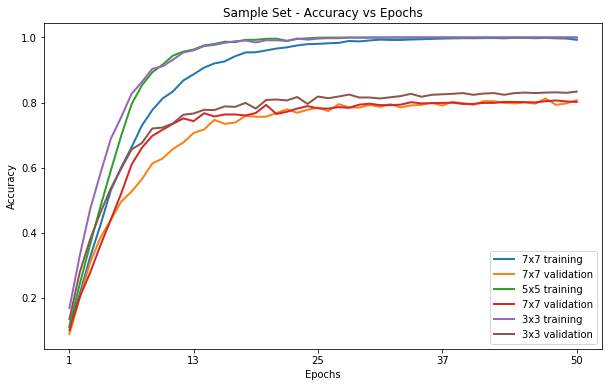

In [185]:
metrics_arr = [c_sample_7x7_tr_metrics, c_sample_7x7_val_metrics, c_sample_5x5_tr_metrics, c_sample_5x5_val_metrics, c_sample_3x3_tr_metrics, c_sample_3x3_val_metrics]
lbs = ["7x7 training", "7x7 validation", "5x5 training", "7x7 validation", "3x3 training", "3x3 validation"]
plot_results(metrics_arr, 2, lbs, "Epochs", "Accuracy", "Sample Set - Accuracy vs Epochs", fig_size=(10, 6))

#### Color Full Dataset

In [133]:
mc_3x3 = ModelConfig(EdLeNet, "EdLeNet_Full_Color_3x3", [32, 32, 3], [3, 32, 3], [120, 84], n_classes, [1.0, 1.0])
mc_5x5 = ModelConfig(EdLeNet, "EdLeNet_Full_Color_5x5", [32, 32, 3], [5, 32, 2], [120, 84], n_classes, [1.0, 1.0])

In [ ]:
me_c_3x3 = ModelExecutor(mc_3x3)
me_c_5x5 = ModelExecutor(mc_5x5)

[EdLeNet] Building neural network [conv layers=3, conv filter size=3, conv start depth=32, fc layers=2]
[EdLeNet] Building neural network [conv layers=2, conv filter size=5, conv start depth=32, fc layers=2]


In [ ]:
(c_3x3_tr_metrics, c_3x3_val_metrics, c_3x3_duration) = me_c_3x3.train_model(X_train, y_train, X_valid, y_valid, epochs=100)
(c_3x3_ts_accuracy, c_3x3_ts_loss, c_3x3_ts_duration) =  me_c_3x3.test_model(X_test, y_test)

Training EdLeNet_Full_Color_3x3 [epochs=100, batch_size=512]...

[1]	total=6.130s | train: time=3.758s, loss=2.2867, acc=0.4306 | val: time=2.372s, loss=2.7396, acc=0.3519
[10]	total=5.481s | train: time=3.181s, loss=0.0366, acc=0.9917 | val: time=2.300s, loss=0.9729, acc=0.8578
[20]	total=5.479s | train: time=3.181s, loss=0.0441, acc=0.9870 | val: time=2.298s, loss=1.2094, acc=0.8522
[30]	total=5.481s | train: time=3.180s, loss=0.0005, acc=1.0000 | val: time=2.301s, loss=0.9854, acc=0.9020
[40]	total=5.478s | train: time=3.177s, loss=0.0002, acc=1.0000 | val: time=2.301s, loss=1.0298, acc=0.9016
[50]	total=5.486s | train: time=3.180s, loss=0.0001, acc=1.0000 | val: time=2.306s, loss=1.0674, acc=0.9050
[60]	total=5.472s | train: time=3.178s, loss=0.0001, acc=1.0000 | val: time=2.294s, loss=1.1092, acc=0.9050
[70]	total=5.484s | train: time=3.178s, loss=0.0000, acc=1.0000 | val: time=2.306s, loss=1.1230, acc=0.9070


In [207]:
(c_5x5_tr_metrics, c_5x5_val_metrics, c_5x5_duration) = me_c_5x5.train_model(X_train, y_train, X_valid, y_valid, epochs=100)
(c_5x5_ts_accuracy, c_5x5_ts_loss, c_5x5_ts_duration) =  me_c_5x5.test_model(X_test, y_test)

Training EdLeNet_Full_Color_5x5 [epochs=100, batch_size=512]...

[1]	total=10.753s | train: time=5.043s, loss=3.0010, acc=0.2832 | val: time=5.710s, loss=3.4379, acc=0.2576
[10]	total=5.032s | train: time=2.856s, loss=0.0774, acc=0.9797 | val: time=2.176s, loss=1.0795, acc=0.8417
[20]	total=5.019s | train: time=2.847s, loss=0.0088, acc=0.9986 | val: time=2.172s, loss=1.2972, acc=0.8590
[30]	total=5.023s | train: time=2.850s, loss=0.0015, acc=1.0000 | val: time=2.174s, loss=1.2946, acc=0.8789
[40]	total=5.031s | train: time=2.850s, loss=0.0004, acc=1.0000 | val: time=2.180s, loss=1.4476, acc=0.8794
[50]	total=5.015s | train: time=2.839s, loss=0.0002, acc=1.0000 | val: time=2.176s, loss=1.5213, acc=0.8810
[60]	total=5.019s | train: time=2.847s, loss=0.0001, acc=1.0000 | val: time=2.172s, loss=1.5810, acc=0.8816
[70]	total=5.018s | train: time=2.843s, loss=0.0001, acc=1.0000 | val: time=2.175s, loss=1.6275, acc=0.8819
[80]	total=5.019s | train: time=2.845s, loss=0.0000, acc=1.0000 | val: 

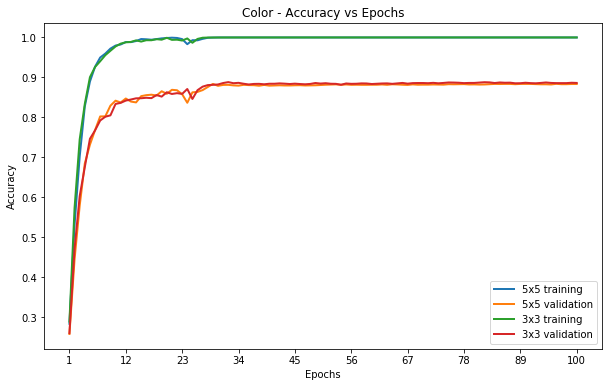

In [208]:
metrics_arr = [c_5x5_tr_metrics, c_5x5_val_metrics, c_3x3_tr_metrics, c_3x3_val_metrics]
lbs = ["5x5 training", "5x5 validation", "3x3 training", "3x3 validation"]
plot_results(metrics_arr, 2, lbs, "Epochs", "Accuracy", "Color - Accuracy vs Epochs", fig_size=(10, 6))

Once again, the model with 3x3 convolutions is the fastest one to converge on the training set, but it definitely shows signs of overfit. The 5x5 model on the other hand, seems to be more generic and produces lower losses on and better accuracy on sets (and the validation set too!).

#### Grayscale Full Dataset

In [195]:
# Reshaping our inputs to a format that tensorflow accepts (i.e. a 4D tensor)
X_train_grayscale = np.reshape(X_train_grayscale, (X_train_grayscale.shape[0], 32, 32, 1))
X_valid_grayscale = np.reshape(X_valid_grayscale, (X_valid_grayscale.shape[0], 32, 32, 1))
X_test_grayscale = np.reshape(X_test_grayscale, (X_test_grayscale.shape[0], 32, 32, 1))

In [209]:
mc_3x3 = ModelConfig(EdLeNet, "EdLeNet_Grayscale_3x3", [32, 32, 1], [3, 32, 3], [120, 84], n_classes, [1.0, 1.0])
mc_5x5 = ModelConfig(EdLeNet, "EdLeNet_Grayscale_5x5", [32, 32, 1], [5, 32, 2], [120, 84], n_classes, [1.0, 1.0])

In [210]:
me_g_3x3 = ModelExecutor(mc_3x3)
me_g_5x5 = ModelExecutor(mc_5x5)

[EdLeNet] Building neural network [conv layers=3, conv filter size=3, conv start depth=32, fc layers=2]
[EdLeNet] Building neural network [conv layers=2, conv filter size=5, conv start depth=32, fc layers=2]


In [211]:
(g_3x3_tr_metrics, g_3x3_val_metrics, g_3x3_duration) = me_g_3x3.train_model(X_train_grayscale, y_train, X_valid_grayscale, y_valid, epochs=100)
(g_3x3_ts_accuracy, g_3x3_ts_loss, g_3x3_ts_duration) =  me_g_3x3.test_model(X_test_grayscale, y_test)

Training EdLeNet_Grayscale_3x3 [epochs=100, batch_size=512]...

[1]	total=10.823s | train: time=5.056s, loss=2.9329, acc=0.2676 | val: time=5.768s, loss=3.1962, acc=0.2254
[10]	total=5.028s | train: time=2.997s, loss=0.0968, acc=0.9757 | val: time=2.031s, loss=0.9143, acc=0.8574
[20]	total=5.021s | train: time=2.992s, loss=0.0216, acc=0.9943 | val: time=2.029s, loss=0.8394, acc=0.8925
[30]	total=5.022s | train: time=2.994s, loss=0.0083, acc=0.9979 | val: time=2.029s, loss=0.8890, acc=0.9084
[40]	total=5.031s | train: time=2.996s, loss=0.0160, acc=0.9954 | val: time=2.035s, loss=1.0215, acc=0.9061


KeyboardInterrupt: 

In [ ]:
(g_5x5_tr_metrics, g_5x5_val_metrics, g_5x5_duration) = me_g_5x5.train_model(X_train_grayscale, y_train, X_valid_grayscale, y_valid, epochs=100)
(g_5x5_ts_accuracy, g_5x5_ts_loss, g_5x5_ts_duration) =  me_g_5x5.test_model(X_test_grayscale, y_test)

In [ ]:
metrics_arr = [g_5x5_tr_metrics, g_5x5_val_metrics, g_3x3_tr_metrics, g_3x3_val_metrics]
lbs = ["5x5 training", "5x5 validation", "3x3 training", "3x3 validation"]
plot_results(metrics_arr, 2, lbs, "Epochs", "Accuracy", "Grayscale - Accuracy vs Epochs", fig_size=(10, 6))

Similarly, we see the same pattern with the grayscale image. In fact we converge much more quickly and better with grayscale images. The next step is to evaluate whether image normalisation can help improve validation and test set accuracies. At the moment, our focus is not on training set accuracy as we still need to push our validation set accuracy above 93%.

### Normalised Images

We now assess the model on normnalised images, which should presumably allow faster convergence on both training and validation sets.

#### Color

In [212]:
mc_3x3 = ModelConfig(EdLeNet, "EdLeNet_Color_Norm_3x3", [32, 32, 3], [3, 16, 3], [120, 84], n_classes, [1.0, 1.0])
mc_5x5 = ModelConfig(EdLeNet, "EdLeNet_Color_Norm_5x5", [32, 32, 3], [5, 16, 2], [120, 84], n_classes, [1.0, 1.0])

In [213]:
me_c_norm_3x3 = ModelExecutor(mc_3x3)
me_c_norm_5x5 = ModelExecutor(mc_5x5)

[EdLeNet] Building neural network [conv layers=3, conv filter size=3, conv start depth=16, fc layers=2]
[EdLeNet] Building neural network [conv layers=2, conv filter size=5, conv start depth=16, fc layers=2]


In [214]:
(c_norm_3x3_tr_metrics, c_norm_3x3_val_metrics, c_norm_3x3_duration) = me_c_norm_3x3.train_model(X_train_normalised, y_train, X_valid_normalised, y_valid, epochs=100)
(c_norm_3x3_ts_accuracy, c_norm_3x3_ts_loss, c_norm_3x3_ts_duration) =  me_c_norm_3x3.test_model(X_test_normalised, y_test)

Training EdLeNet_Color_Norm_3x3 [epochs=100, batch_size=512]...

[1]	total=10.191s | train: time=4.465s, loss=1.9260, acc=0.4532 | val: time=5.726s, loss=2.2351, acc=0.4088
[10]	total=4.061s | train: time=2.378s, loss=0.0811, acc=0.9801 | val: time=1.683s, loss=0.6865, acc=0.8626
[20]	total=4.064s | train: time=2.380s, loss=0.0164, acc=0.9971 | val: time=1.685s, loss=0.6960, acc=0.8905
[30]	total=4.060s | train: time=2.379s, loss=0.0058, acc=0.9994 | val: time=1.681s, loss=0.7494, acc=0.8937
[40]	total=4.066s | train: time=2.381s, loss=0.0010, acc=1.0000 | val: time=1.685s, loss=0.9146, acc=0.8884
[50]	total=4.067s | train: time=2.383s, loss=0.0003, acc=1.0000 | val: time=1.683s, loss=0.9556, acc=0.8925
[60]	total=4.064s | train: time=2.384s, loss=0.0074, acc=0.9983 | val: time=1.681s, loss=0.6162, acc=0.9127
[70]	total=4.077s | train: time=2.396s, loss=0.0003, acc=1.0000 | val: time=1.681s, loss=0.7434, acc=0.9141
[80]	total=4.068s | train: time=2.382s, loss=0.0002, acc=1.0000 | val: 

KeyboardInterrupt: 

In [ ]:
(c_norm_5x5_tr_metrics, c_norm_5x5_val_metrics, c_norm_5x5_duration) = me_c_norm_5x5.train_model(X_train_normalised, y_train, X_valid_normalised, y_valid, epochs=100)
(c_norm_5x5_ts_accuracy, c_norm_5x5_ts_loss, c_norm_5x5_ts_duration) =  me_c_norm_5x5.test_model(X_test_normalised, y_test)

In [ ]:
metrics_arr = [c_norm_5x5_tr_metrics, c_norm_5x5_val_metrics, c_norm_3x3_tr_metrics, c_norm_3x3_val_metrics]
lbs = ["5x5 training", "5x5 validation", "3x3 training", "3x3 validation"]
plot_results(metrics_arr, 2, lbs, "Epochs", "Accuracy", "Color (Normalised) - Accuracy vs Epochs", fig_size=(10, 6))

We (un-?)surprisingly obtain better validation accuracy on the 5x5 model. The sharp dips at some epochs probably come for the aggresive learning rate we have selected. Both models self-correct a few epochs later. Note that by normalising images we manage to achieve over 93% on test set with the 5x5 model (and over 95% on validation set)! Let's explore running the model on normalised grayscale images next.

#### Grayscale

In [86]:
# Normalise grayscale images too
X_train_grayscale_normalised = normalise_images(X_train_grayscale, X_train_grayscale)
X_valid_grayscale_normalised = normalise_images(X_valid_grayscale, X_train_grayscale)
X_test_grayscale_normalised = normalise_images(X_test_grayscale, X_train_grayscale)

In [87]:
mc_3x3 = ModelConfig(EdLeNet, "EdLeNet_Grayscale_Norm_3x3", [32, 32, 1], 3, [120, 84], n_classes, 1.0)
mc_5x5 = ModelConfig(EdLeNet, "EdLeNet_Grayscale_Norm_5x5", [32, 32, 1], 5, [120, 84], n_classes, 1.0)

In [88]:
me_g_norm_3x3 = ModelExecutor(mc_3x3)
me_g_norm_5x5 = ModelExecutor(mc_5x5)

In [89]:
(g_norm_3x3_tr_metrics, g_norm_3x3_val_metrics, g_norm_3x3_duration) = me_g_norm_3x3.train_model(X_train_grayscale_normalised, y_train, X_valid_grayscale_normalised, y_valid, epochs=100)
(g_norm_3x3_ts_accuracy, g_norm_3x3_ts_loss, g_norm_3x3_ts_duration) =  me_g_norm_3x3.test_model(X_test_grayscale_normalised, y_test)

Training EdLeNet_Grayscale_Norm_3x3 [epochs=100, batch_size=512]...

[1]	total=3.160s | train: time=1.880s, loss=1.5681, acc=0.5608 | val: time=1.281s, loss=1.9522, acc=0.4639
[10]	total=2.606s | train: time=1.588s, loss=0.0649, acc=0.9872 | val: time=1.019s, loss=0.4484, acc=0.8909
[20]	total=2.602s | train: time=1.592s, loss=0.0134, acc=0.9984 | val: time=1.010s, loss=0.5309, acc=0.8975
[30]	total=2.607s | train: time=1.594s, loss=0.0031, acc=0.9999 | val: time=1.014s, loss=0.5725, acc=0.9057
[40]	total=2.597s | train: time=1.585s, loss=0.0010, acc=1.0000 | val: time=1.012s, loss=0.6844, acc=0.9000
[50]	total=2.595s | train: time=1.588s, loss=0.0009, acc=1.0000 | val: time=1.007s, loss=0.5265, acc=0.9197
[60]	total=2.606s | train: time=1.589s, loss=0.0003, acc=1.0000 | val: time=1.017s, loss=0.6129, acc=0.9168
[70]	total=2.608s | train: time=1.589s, loss=0.0002, acc=1.0000 | val: time=1.019s, loss=0.6738, acc=0.9138
[80]	total=2.615s | train: time=1.598s, loss=0.0002, acc=1.0000 | va

In [90]:
(g_norm_5x5_tr_metrics, g_norm_5x5_val_metrics, g_norm_5x5_duration) = me_g_norm_5x5.train_model(X_train_grayscale_normalised, y_train, X_valid_grayscale_normalised, y_valid, epochs=100)
(g_norm_5x5_ts_accuracy, g_norm_5x5_ts_loss, g_norm_5x5_ts_duration) =  me_g_norm_5x5.test_model(X_test_grayscale_normalised, y_test)

Training EdLeNet_Grayscale_Norm_5x5 [epochs=100, batch_size=512]...

[1]	total=2.940s | train: time=1.706s, loss=1.2458, acc=0.6723 | val: time=1.234s, loss=1.5266, acc=0.5986
[10]	total=2.394s | train: time=1.444s, loss=0.0546, acc=0.9868 | val: time=0.950s, loss=0.4632, acc=0.9061
[20]	total=2.396s | train: time=1.444s, loss=0.0112, acc=0.9981 | val: time=0.952s, loss=0.4801, acc=0.9145
[30]	total=2.392s | train: time=1.442s, loss=0.0015, acc=1.0000 | val: time=0.950s, loss=0.4749, acc=0.9320
[40]	total=2.390s | train: time=1.440s, loss=0.0009, acc=1.0000 | val: time=0.950s, loss=0.5397, acc=0.9222
[50]	total=2.406s | train: time=1.448s, loss=0.0004, acc=1.0000 | val: time=0.958s, loss=0.4603, acc=0.9374
[60]	total=2.396s | train: time=1.447s, loss=0.0002, acc=1.0000 | val: time=0.949s, loss=0.4817, acc=0.9397
[70]	total=2.395s | train: time=1.440s, loss=0.0001, acc=1.0000 | val: time=0.955s, loss=0.5039, acc=0.9404
[80]	total=2.399s | train: time=1.444s, loss=0.0001, acc=1.0000 | va

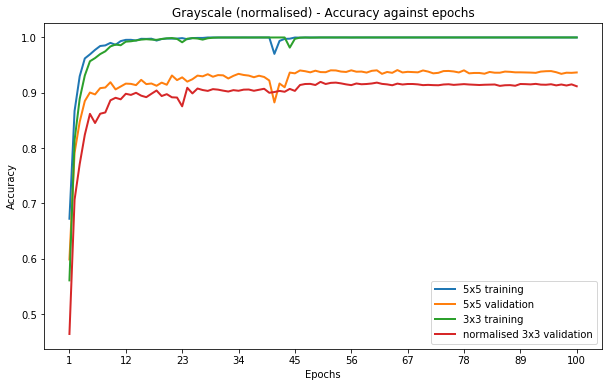

In [91]:
metrics_arr = [g_norm_5x5_tr_metrics, g_norm_5x5_val_metrics, g_norm_3x3_tr_metrics, g_norm_3x3_val_metrics]
lbs = ["5x5 training", "5x5 validation", "3x3 training", "normalised 3x3 validation"]
plot_results(metrics_arr, 2, lbs, "Epochs", "Accuracy", "Grayscale (normalised) - Accuracy against epochs", fig_size=(10, 6))

Once again, the 5x5 model outperforms the 3x3 on grayscale images, but we don't quite reach the 93% accuracy on the test set. We will try to improve our score by resorting to using drop out next.

### Dropout - Drop 25% of weights in Fully Connected Layers

Let's start with a keep percentage of 75% to see what kind of results we get...

#### Color (Normalised)

In [223]:
mc_3x3 = ModelConfig(EdLeNet, "EdLeNet_3x3_Color_Dropout_0.25", [32, 32, 3], [3, 16, 3], [120, 84], n_classes, [0.9, 0.75])
mc_5x5 = ModelConfig(EdLeNet, "EdLeNet_3x3_Color_Dropout_0.25", [32, 32, 3], [5, 16, 2], [120, 84], n_classes, [0.9, 0.75])

In [224]:
me_c_norm_drpt_0_25_3x3 = ModelExecutor(mc_3x3)
me_c_norm_drpt_0_25_5x5 = ModelExecutor(mc_5x5)

[EdLeNet] Building neural network [conv layers=3, conv filter size=3, conv start depth=16, fc layers=2]
[EdLeNet] Building neural network [conv layers=2, conv filter size=5, conv start depth=16, fc layers=2]


In [225]:
(c_norm_drpt_0_25_3x3_tr_metrics, c_norm_drpt_0_25_3x3_val_metrics, c_norm_drpt_0_25_3x3_duration) = me_c_norm_drpt_0_25_3x3.train_model(X_train_normalised, y_train, X_valid_normalised, y_valid, epochs=120)
(_c_norm_drpt_0_25_3x3_ts_accuracy, c_norm_drpt_0_25_3x3_ts_loss, c_norm_drpt_0_25_ts_duration) =  me_c_norm_drpt_0_25_3x3.test_model(X_test_normalised, y_test)

Training EdLeNet_3x3_Color_Dropout_0.25 [epochs=120, batch_size=512]...

[1]	total=11.816s | train: time=4.963s, loss=2.4713, acc=0.3485 | val: time=6.853s, loss=2.5987, acc=0.2900
[10]	total=4.073s | train: time=2.384s, loss=0.0994, acc=0.9755 | val: time=1.689s, loss=0.2967, acc=0.9261
[20]	total=4.068s | train: time=2.381s, loss=0.0241, acc=0.9946 | val: time=1.687s, loss=0.2284, acc=0.9531
[30]	total=4.068s | train: time=2.383s, loss=0.0100, acc=0.9981 | val: time=1.685s, loss=0.2314, acc=0.9580
[40]	total=4.060s | train: time=2.377s, loss=0.0055, acc=0.9990 | val: time=1.683s, loss=0.2148, acc=0.9662
[50]	total=4.062s | train: time=2.381s, loss=0.0031, acc=0.9994 | val: time=1.681s, loss=0.2083, acc=0.9639
[60]	total=4.063s | train: time=2.381s, loss=0.0019, acc=0.9998 | val: time=1.683s, loss=0.1652, acc=0.9692
[70]	total=4.063s | train: time=2.382s, loss=0.0011, acc=0.9998 | val: time=1.682s, loss=0.2173, acc=0.9678
[80]	total=4.065s | train: time=2.391s, loss=0.0006, acc=0.9999

In [221]:
(c_norm_drpt_0_25_5x5_tr_metrics, c_norm_drpt_0_25_5x5_val_metrics, c_norm_drpt_0_25_5x5_duration) = me_c_norm_drpt_0_25_5x5.train_model(X_train_normalised, y_train, X_valid_normalised, y_valid, epochs=200)
(c_norm_drpt_0_25_5x5_ts_accuracy, c_norm_drpt_0_25_5x5_ts_loss, c_norm_drpt_0_25_5x5_ts_duration) =  me_c_norm_drpt_0_25_5x5.test_model(X_test_normalised, y_test)

Training EdLeNet_3x3_Color_Dropout_0.25 [epochs=200, batch_size=512]...

[1]	total=10.888s | train: time=4.692s, loss=1.7052, acc=0.5530 | val: time=6.196s, loss=1.8642, acc=0.4909
[10]	total=3.660s | train: time=2.180s, loss=0.0412, acc=0.9918 | val: time=1.479s, loss=0.1742, acc=0.9576
[20]	total=3.663s | train: time=2.187s, loss=0.0117, acc=0.9981 | val: time=1.476s, loss=0.1382, acc=0.9676
[30]	total=3.650s | train: time=2.174s, loss=0.0041, acc=0.9995 | val: time=1.475s, loss=0.1169, acc=0.9730
[40]	total=3.669s | train: time=2.184s, loss=0.0017, acc=0.9997 | val: time=1.484s, loss=0.1228, acc=0.9692
[50]	total=3.665s | train: time=2.186s, loss=0.0014, acc=0.9997 | val: time=1.479s, loss=0.1149, acc=0.9741
[60]	total=3.651s | train: time=2.176s, loss=0.0006, acc=0.9999 | val: time=1.475s, loss=0.1041, acc=0.9760
[70]	total=3.656s | train: time=2.179s, loss=0.0005, acc=1.0000 | val: time=1.476s, loss=0.1154, acc=0.9744
[80]	total=3.650s | train: time=2.167s, loss=0.0003, acc=1.0000

ValueError: x and y must have same first dimension, but have shapes (200,) and (120,)

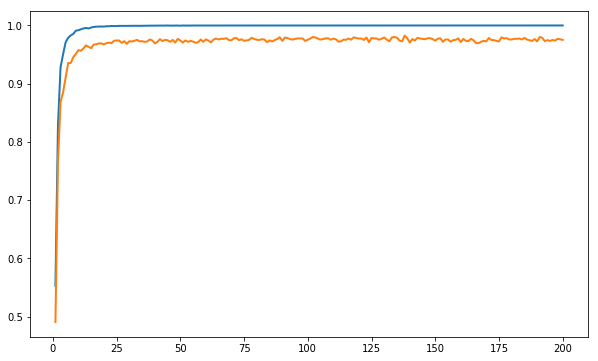

In [243]:
metrics_arr = [c_norm_drpt_0_25_5x5_tr_metrics, c_norm_drpt_0_25_5x5_val_metrics, c_norm_drpt_0_25_3x3_tr_metrics, c_norm_drpt_0_25_3x3_val_metrics]
lbs = ["5x5 training", "5x5 validation", "3x3 training", "3x3 validation"]
plot_results(metrics_arr, 2, lbs, "Epochs", "Accuracy", "Color (normalised) - Accuracy vs Epochs (with dropout, p=0.75)", fig_size=(10, 6))

Those are very encouraging results. The 3x3 model achieves above 93% accuracy while **the 5x5 model achieves over 94% test accuracy**. 

#### Grayscale (Normalised)

In [226]:
mc_3x3 = ModelConfig(EdLeNet, "EdLeNet_Grayscale_Norm_3x3_Dropout_0.25", [32, 32, 1], [3, 16, 3] [120, 84], n_classes, [0.9, 0.75])
mc_5x5 = ModelConfig(EdLeNet, "EdLeNet_Grayscale_Norm_5x5_Dropout_0.25", [32, 32, 1], [5, 16, 2], [120, 84], n_classes, [0.9, 0.75])

TypeError: list indices must be integers or slices, not tuple

In [ ]:
me_g_norm_drpt_0_25_3x3 = ModelExecutor(mc_3x3)
me_g_norm_drpt_0_25_5x5 = ModelExecutor(mc_5x5)

In [ ]:
(g_norm_drpt_0_25_3x3_tr_metrics, g_norm_drpt_0_25_3x3_val_metrics, g_norm_drpt_0_25_3x3_duration) = me_g_norm_drpt_0_25_3x3.train_model(X_train_grayscale_normalised, y_train, X_valid_grayscale_normalised, y_valid, epochs=120)
(g_norm_drpt_0_25_3x3_ts_accuracy, g_norm_drpt_0_25_3x3_ts_loss, g_norm_drpt_0_25_ts_3x3_duration) =  me_g_norm_drpt_0_25_3x3.test_model(X_test_grayscale_normalised, y_test)

In [135]:
(g_norm_drpt_0_25_5x5_tr_metrics, g_norm_drpt_0_25_5x5_val_metrics, g_norm_drpt_0_25_5x5_duration) = me_g_norm_drpt_0_25_5x5.train_model(X_train_grayscale_normalised, y_train, X_valid_grayscale_normalised, y_valid, epochs=200)
(g_norm_drpt_0_25_5x5_ts_accuracy, g_norm_drpt_0_25_5x5_ts_loss, g_norm_drpt_0_25_ts_5x5_duration) =  me_g_norm_drpt_0_25_5x5.test_model(X_test_grayscale_normalised, y_test)

Training EdLeNet_Grayscale_Norm_5x5_Dropout_0.25 [epochs=200, batch_size=512]...

[1]	total=5.142s | train: time=2.524s, loss=2.4222, acc=0.3434 | val: time=2.618s, loss=2.6924, acc=0.2848
[10]	total=3.397s | train: time=1.925s, loss=0.1955, acc=0.9411 | val: time=1.472s, loss=0.5371, acc=0.8669
[20]	total=3.399s | train: time=1.932s, loss=0.0968, acc=0.9713 | val: time=1.467s, loss=0.4173, acc=0.9041
[30]	total=3.400s | train: time=1.924s, loss=0.0540, acc=0.9848 | val: time=1.476s, loss=0.3618, acc=0.9204
[40]	total=3.399s | train: time=1.923s, loss=0.0400, acc=0.9878 | val: time=1.475s, loss=0.3360, acc=0.9315
[50]	total=3.404s | train: time=1.933s, loss=0.0309, acc=0.9902 | val: time=1.470s, loss=0.4117, acc=0.9245
[60]	total=3.404s | train: time=1.933s, loss=0.0241, acc=0.9921 | val: time=1.471s, loss=0.3781, acc=0.9388
[70]	total=3.393s | train: time=1.922s, loss=0.0246, acc=0.9925 | val: time=1.471s, loss=0.4006, acc=0.9302
[80]	total=3.398s | train: time=1.924s, loss=0.0184, ac

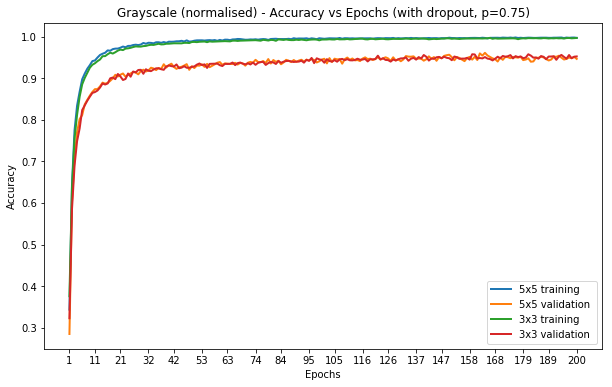

In [136]:
metrics_arr = [g_norm_drpt_0_25_5x5_tr_metrics, g_norm_drpt_0_25_5x5_val_metrics, g_norm_drpt_0_25_3x3_tr_metrics, g_norm_drpt_0_25_3x3_val_metrics]
lbs = ["5x5 training", "5x5 validation", "3x3 training", "3x3 validation "]
plot_results(metrics_arr, 2, lbs, "Epochs", "Accuracy", "Grayscale (normalised) - Accuracy vs Epochs (with dropout, p=0.75)", fig_size=(10, 6))

Once again, both 3x3 and 5x5 variants are very close, accuracy-wise on all dataset types. Dropout seems to be somewhat effective but we were too tame with our initial value. We will now bump dropout to much higher values.

### Dropout - Keep 60% of Weights

#### Grayscale

In [231]:
mc_3x3 = ModelConfig(EdLeNet, "EdLeNet_Norm_Grayscale_3x3_Dropout_0.50", [32, 32, 1], [3, 32, 3], [240, 168], n_classes, [0.75, 0.5])
mc_5x5 = ModelConfig(EdLeNet, "EdLeNet_Norm_Grayscale_5x5_Dropout_0.50", [32, 32, 1], [5, 32, 2], [240, 168], n_classes, [0.75, 0.5])

In [232]:
me_norm_drpt_0_50_g_3x3 = ModelExecutor(mc_3x3)
me_norm_drpt_0_50_g_5x5 = ModelExecutor(mc_5x5)

[EdLeNet] Building neural network [conv layers=3, conv filter size=3, conv start depth=32, fc layers=2]
[EdLeNet] Building neural network [conv layers=2, conv filter size=5, conv start depth=32, fc layers=2]


In [233]:
(c_norm_drpt_0_50_g_3x3_tr_metrics, c_norm_drpt_0_50_g_3x3_val_metrics, c_norm_drpt_0_50_g_3x3_duration) = me_norm_drpt_0_50_g_3x3.train_model(X_train_grayscale_normalised, y_train, X_valid_grayscale_normalised, y_valid, epochs=150)
(c_norm_drpt_0_50_g_3x3_ts_accuracy, c_norm_drpt_0_50_g_3x3_ts_loss, c_norm_drpt_0_50_g_ts_3x3_duration) =  me_norm_drpt_0_50_g_3x3.test_model(X_test_grayscale_normalised, y_test)

Training EdLeNet_Norm_Grayscale_3x3_Dropout_0.50 [epochs=150, batch_size=512]...

[1]	total=13.126s | train: time=5.765s, loss=3.5271, acc=0.1089 | val: time=7.361s, loss=3.5785, acc=0.0923
[10]	total=5.137s | train: time=3.084s, loss=0.1702, acc=0.9580 | val: time=2.053s, loss=0.2871, acc=0.9152
[20]	total=5.137s | train: time=3.085s, loss=0.0300, acc=0.9928 | val: time=2.052s, loss=0.0846, acc=0.9739
[30]	total=5.132s | train: time=3.080s, loss=0.0090, acc=0.9982 | val: time=2.052s, loss=0.0641, acc=0.9776
[40]	total=5.133s | train: time=3.083s, loss=0.0046, acc=0.9987 | val: time=2.050s, loss=0.0583, acc=0.9834
[50]	total=5.133s | train: time=3.082s, loss=0.0025, acc=0.9995 | val: time=2.051s, loss=0.0565, acc=0.9855
[60]	total=5.130s | train: time=3.080s, loss=0.0022, acc=0.9995 | val: time=2.050s, loss=0.0454, acc=0.9889
[70]	total=5.131s | train: time=3.078s, loss=0.0008, acc=0.9999 | val: time=2.053s, loss=0.0513, acc=0.9882
[80]	total=5.133s | train: time=3.080s, loss=0.0005, a

In [234]:
(c_norm_drpt_0_50_g_5x5_tr_metrics, c_norm_drpt_0_50_g_5x5_val_metrics, c_norm_drpt_0_50_g_5x5_duration) = me_norm_drpt_0_50_g_5x5.train_model(X_train_grayscale_normalised, y_train, X_valid_grayscale_normalised, y_valid, epochs=150)
(c_norm_drpt_0_50_g_5x5_ts_accuracy, c_norm_drpt_0_50_g_5x5_ts_loss, c_norm_drpt_0_50_g_ts_5x5_duration) =  me_norm_drpt_0_50_g_5x5.test_model(X_test_grayscale_normalised, y_test)

Training EdLeNet_Norm_Grayscale_5x5_Dropout_0.50 [epochs=150, batch_size=512]...

[1]	total=12.471s | train: time=5.353s, loss=3.4154, acc=0.1897 | val: time=7.118s, loss=3.4610, acc=0.1583
[10]	total=4.199s | train: time=2.487s, loss=0.1103, acc=0.9795 | val: time=1.711s, loss=0.2115, acc=0.9385
[20]	total=4.206s | train: time=2.493s, loss=0.0209, acc=0.9965 | val: time=1.713s, loss=0.1155, acc=0.9658
[30]	total=4.204s | train: time=2.487s, loss=0.0074, acc=0.9987 | val: time=1.717s, loss=0.1021, acc=0.9683
[40]	total=4.198s | train: time=2.479s, loss=0.0030, acc=0.9995 | val: time=1.719s, loss=0.0647, acc=0.9810
[50]	total=4.197s | train: time=2.481s, loss=0.0013, acc=0.9998 | val: time=1.715s, loss=0.0687, acc=0.9805
[60]	total=4.189s | train: time=2.477s, loss=0.0014, acc=0.9998 | val: time=1.711s, loss=0.0810, acc=0.9782
[70]	total=4.197s | train: time=2.476s, loss=0.0006, acc=1.0000 | val: time=1.721s, loss=0.0743, acc=0.9810
[80]	total=4.197s | train: time=2.478s, loss=0.0004, a

In [269]:
import utils; reload(utils)
from utils import *

Length of axis: (2,)


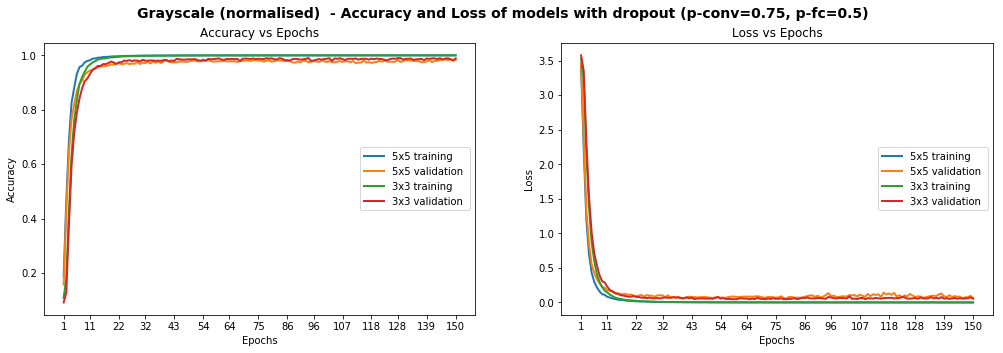

In [270]:
metrics_arr = [c_norm_drpt_0_50_g_5x5_tr_metrics, c_norm_drpt_0_50_g_5x5_val_metrics, c_norm_drpt_0_50_g_3x3_tr_metrics, c_norm_drpt_0_50_g_3x3_val_metrics]
lbs = ["5x5 training", "5x5 validation", "3x3 training", "3x3 validation "]
plot_model_results(metrics_arr, [2, 1], lbs, ["Epochs", "Epochs"], ["Accuracy", "Loss"], 
                   ["Accuracy vs Epochs", 
                    "Loss vs Epochs"],
                   "Grayscale (normalised)  - Accuracy and Loss of models with dropout (p-conv=0.75, p-fc=0.5)"
                    , fig_size=(17, 5))

We are are now comfortably hitting highter than 93% with the 5x5 model on grayscale (normalised) images and dropping 40% of the weights. Let's try color running a similar model on color images.

#### Color

In [271]:
mc_3x3 = ModelConfig(EdLeNet, "EdLeNet_Color_Norm_3x3_Dropout_0.40", [32, 32, 3], [3, 32, 3], [120, 84], n_classes, [0.75, 0.5])
mc_5x5 = ModelConfig(EdLeNet, "EdLeNet_Color_Norm_5x5_Dropout_0.40", [32, 32, 3], [5, 32, 2], [120, 84], n_classes, [0.75, 0.5])

In [274]:
me_c_norm_drpt_0_50_3x3 = ModelExecutor(mc_3x3, learning_rate=0.001)
me_c_norm_drpt_0_50_5x5 = ModelExecutor(mc_5x5, learning_rate=0.001)

[EdLeNet] Building neural network [conv layers=3, conv filter size=3, conv start depth=32, fc layers=2]
[EdLeNet] Building neural network [conv layers=2, conv filter size=5, conv start depth=32, fc layers=2]


In [275]:
(c_norm_drpt_0_50_3x3_tr_metrics, c_norm_drpt_0_50_3x3_val_metrics, c_norm_drpt_0_50_3x3_duration) = me_c_norm_drpt_0_50_3x3.train_model(X_train_normalised, y_train, X_valid_normalised, y_valid, epochs=150)
(c_norm_drpt_0_50_3x3_ts_accuracy, c_norm_drpt_0_50_3x3_ts_loss, c_norm_drpt_0_50_3x3_ts_duration) =  me_c_norm_drpt_0_50_3x3.test_model(X_test_normalised, y_test)

Training EdLeNet_Color_Norm_3x3_Dropout_0.40 [epochs=100, batch_size=512]...

[1]	total=14.533s | train: time=6.385s, loss=3.5466, acc=0.1033 | val: time=8.148s, loss=3.5999, acc=0.0757
[10]	total=5.907s | train: time=3.514s, loss=0.6350, acc=0.7934 | val: time=2.394s, loss=0.8243, acc=0.7646
[20]	total=5.914s | train: time=3.511s, loss=0.0871, acc=0.9835 | val: time=2.402s, loss=0.2236, acc=0.9540
[30]	total=5.919s | train: time=3.517s, loss=0.0241, acc=0.9949 | val: time=2.402s, loss=0.1310, acc=0.9732
[40]	total=5.922s | train: time=3.520s, loss=0.0108, acc=0.9976 | val: time=2.402s, loss=0.1298, acc=0.9773
[50]	total=5.912s | train: time=3.516s, loss=0.0058, acc=0.9987 | val: time=2.396s, loss=0.0940, acc=0.9751
[60]	total=5.919s | train: time=3.522s, loss=0.0034, acc=0.9993 | val: time=2.397s, loss=0.1120, acc=0.9778
[70]	total=5.909s | train: time=3.510s, loss=0.0047, acc=0.9992 | val: time=2.399s, loss=0.0930, acc=0.9766
[80]	total=5.910s | train: time=3.515s, loss=0.0010, acc=0

In [276]:
(c_norm_drpt_0_50_5x5_tr_metrics, c_norm_drpt_0_50_5x5_val_metrics, c_norm_drpt_0_50_5x5_duration) = me_c_norm_drpt_0_50_5x5.train_model(X_train_normalised, y_train, X_valid_normalised, y_valid, epochs=150)
(c_norm_drpt_0_50_5x5_ts_accuracy, c_norm_drpt_0_50_5x5_ts_loss, c_norm_drpt_0_50_5x5_ts_duration) =  me_c_norm_drpt_0_50_5x5.test_model(X_test_normalised, y_test)

Training EdLeNet_Color_Norm_5x5_Dropout_0.40 [epochs=150, batch_size=512]...

[1]	total=14.053s | train: time=5.941s, loss=3.2852, acc=0.1964 | val: time=8.112s, loss=3.3308, acc=0.1866
[10]	total=5.232s | train: time=3.030s, loss=0.2710, acc=0.9363 | val: time=2.201s, loss=0.3680, acc=0.8993
[20]	total=5.237s | train: time=3.035s, loss=0.0539, acc=0.9911 | val: time=2.202s, loss=0.1529, acc=0.9574
[30]	total=5.228s | train: time=3.027s, loss=0.0180, acc=0.9973 | val: time=2.201s, loss=0.0916, acc=0.9730
[40]	total=5.240s | train: time=3.033s, loss=0.0082, acc=0.9986 | val: time=2.206s, loss=0.0859, acc=0.9753
[50]	total=5.235s | train: time=3.034s, loss=0.0041, acc=0.9993 | val: time=2.202s, loss=0.0704, acc=0.9787
[60]	total=5.230s | train: time=3.024s, loss=0.0028, acc=0.9995 | val: time=2.205s, loss=0.0748, acc=0.9791
[70]	total=5.224s | train: time=3.020s, loss=0.0019, acc=0.9997 | val: time=2.204s, loss=0.0662, acc=0.9810
[80]	total=5.216s | train: time=3.018s, loss=0.0019, acc=0

Once again, the 5x5 model beats the 3x3 one, but both score above 93% test accuracy.

## Data Augmentation

We observed earlier that the data presented glaring imbalance across the 43 classes. We are going to use data augmentation techniques in an attempt to:
1. Minimize imbalances across classes
2. Extend dataset and provide additional pictures in different lighting settings and orientations
3. Improve model's ability to become more generic
4. Improve test and validation accuracy

In [277]:
X_train_augs = X_train
y_train_augs = y_train

In [279]:
# This loop augments images per label group
for (lid, lbl), group in X_train_group_by_label:
    #print("[{0}] : {1}".format(lid, lbl))   
    group_count = group['img_id'].size
    idx = group['img_id'].values
    imgs = X_train[idx]
    
    # Take a different population of the subset depending on how many images we have already
    # and vary the number of augmentations depending on size of label group
    pt_spacing = 1.0
    p = 1.0
    n = group_count * 1.25
    
    if group_count > 500 and group_count < 1000:
        pt_spacing = 3.0
        n = group_count * 0.40
    elif group_count >= 1000 and group_count < 2000:
        pt_spacing = 10.0
        n = group_count * 0.20
    elif group_count >= 2000:
        pt_spacing = 20.0
        n = group_count * 0.10
    
    n = int(n)
    
    space_interval = int(group_count / pt_spacing)
    
    rand_idx = np.linspace(0, group_count, num=space_interval, endpoint=False, dtype='int')
    
    selected_rows = group.iloc[rand_idx]
    selected_img = np.array(list(map(lambda img_id: X_train[img_id], selected_rows['img_id'])))
    
    augs = augment_imgs_until_n(selected_img, n, p)
    X_train_augs = np.concatenate((X_train_augs, augs))
    y_train_augs = np.concatenate((y_train_augs, np.repeat(lid, n)))
    
print("New Augmented arrays shape: {0} and {1}".format(X_train_augs.shape, y_train_augs.shape))

New Augmented arrays shape: (45695, 32, 32, 3) and (45695,)


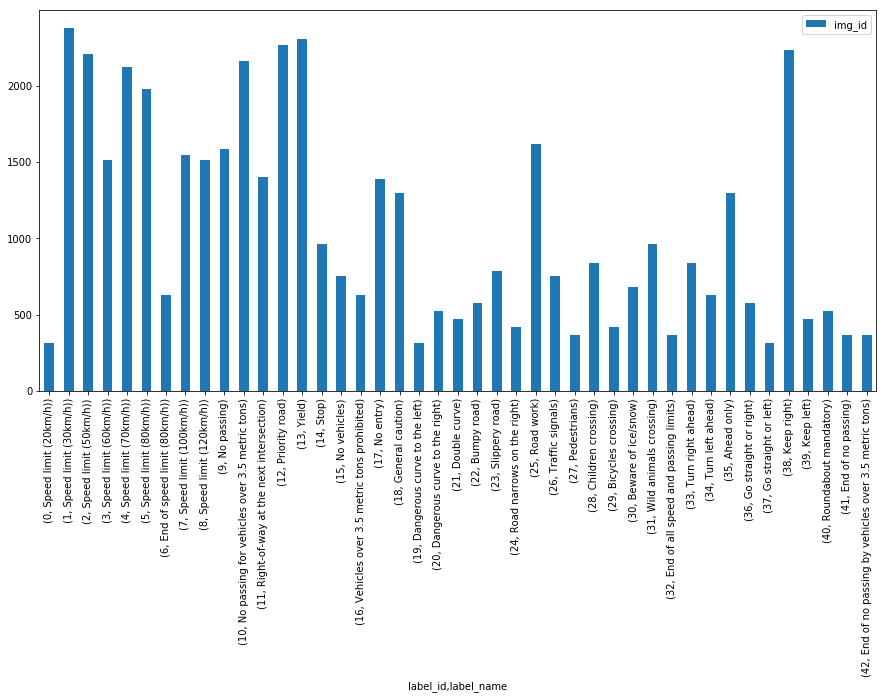

In [280]:
X_train_augs_id_to_label = group_img_id_to_lbl(y_train_augs, sign_names)
X_train_augs_group_by_label_count = group_img_id_to_lb_count(X_train_augs_id_to_label)

# Now count the number of images for each class and plot the results so that we understand the distribution
X_train_augs_group_by_label_count.plot(kind='bar', figsize=(15, 7))

We have managed to mitigate the gaping imbalance we originally observed. Now each class will present at least 1000 examples, and every class has at least 10% of its dataset augmented. Our assumption is that our network should now perform better. Let's put it to the test. The below shows a visuals of the new dataset, with some images having been augmented by the steps above.

In [281]:
# Let's plot images from each of these classes
X_train_augs_group_by_label = X_train_augs_id_to_label.groupby(["label_id", "label_name"])

[0] : Speed limit (20km/h)


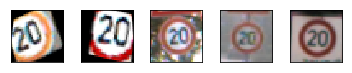

[1] : Speed limit (30km/h)


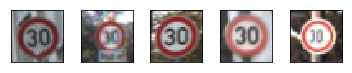

[2] : Speed limit (50km/h)


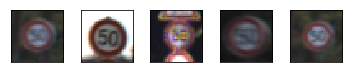

[3] : Speed limit (60km/h)


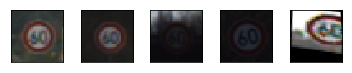

[4] : Speed limit (70km/h)


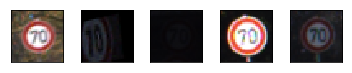

[5] : Speed limit (80km/h)


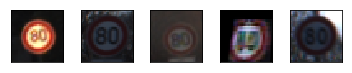

[6] : End of speed limit (80km/h)


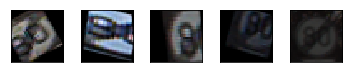

[7] : Speed limit (100km/h)


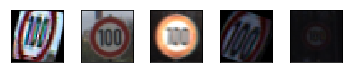

[8] : Speed limit (120km/h)


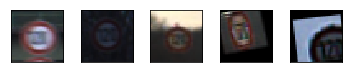

[9] : No passing


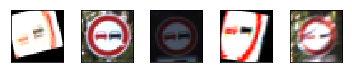

[10] : No passing for vehicles over 3.5 metric tons


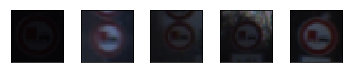

[11] : Right-of-way at the next intersection


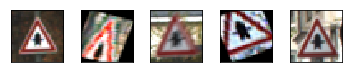

[12] : Priority road


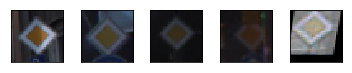

[13] : Yield


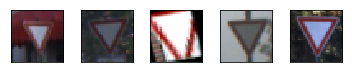

[14] : Stop


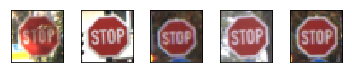

[15] : No vehicles


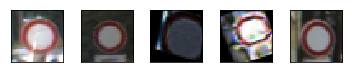

[16] : Vehicles over 3.5 metric tons prohibited


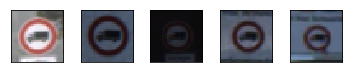

[17] : No entry


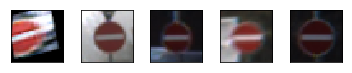

[18] : General caution


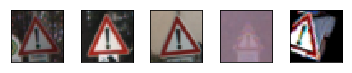

[19] : Dangerous curve to the left


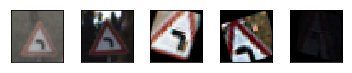

[20] : Dangerous curve to the right


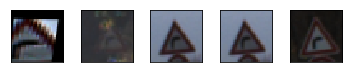

[21] : Double curve


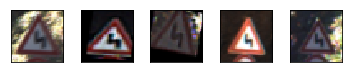

[22] : Bumpy road


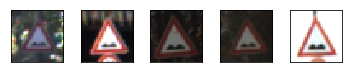

[23] : Slippery road


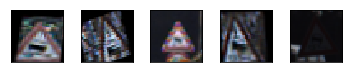

[24] : Road narrows on the right


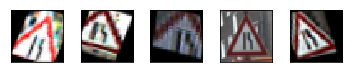

[25] : Road work


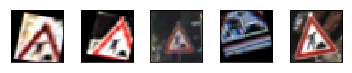

[26] : Traffic signals


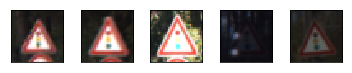

[27] : Pedestrians


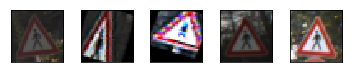

[28] : Children crossing


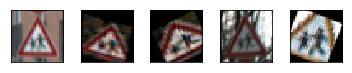

[29] : Bicycles crossing


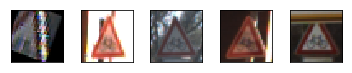

[30] : Beware of ice/snow


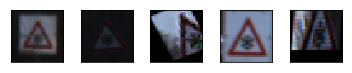

[31] : Wild animals crossing


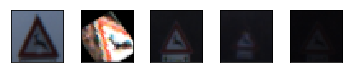

[32] : End of all speed and passing limits


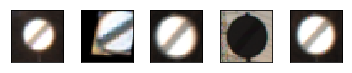

[33] : Turn right ahead


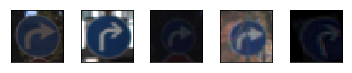

[34] : Turn left ahead


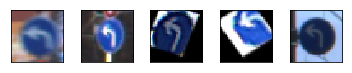

[35] : Ahead only


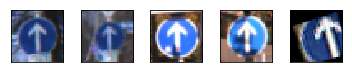

[36] : Go straight or right


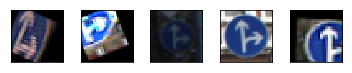

[37] : Go straight or left


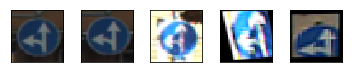

[38] : Keep right


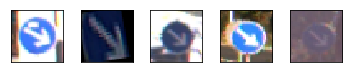

[39] : Keep left


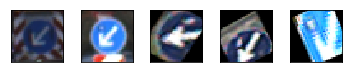

[40] : Roundabout mandatory


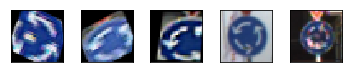

[41] : End of no passing


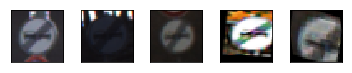

[42] : End of no passing by vehicles over 3.5 metric tons


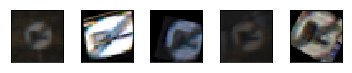

In [282]:
show_random_dataset_images(X_train_augs_group_by_label, X_train_augs)

## Evaluating Augmented Dataset

We once again try first on color images then grayscale ones.

### Color

In [299]:
mc_3x3 = ModelConfig(EdLeNet, "EdLeNet_3x3_Augs_Color", [32, 32, 3], [3, 32, 3], [120, 84], n_classes, [0.9, 0.8])
mc_5x5 = ModelConfig(EdLeNet, "EdLeNet_5x5_Augs_Color", [32, 32, 3], [5, 32, 2], [120, 84], n_classes, [0.9, 0.8])

In [300]:
me_augs_c_3x3 = ModelExecutor(mc_3x3)
me_augs_c_5x5 = ModelExecutor(mc_5x5)

[EdLeNet] Building neural network [conv layers=3, conv filter size=3, conv start depth=32, fc layers=2]
[EdLeNet] Building neural network [conv layers=2, conv filter size=5, conv start depth=32, fc layers=2]


In [301]:
(c_augs_3x3_tr_metrics, c_augs_3x3_val_metrics, c_augs_3x3_duration) = me_augs_c_3x3.train_model(X_train_augs, y_train_augs, X_valid, y_valid, epochs=150)
(c_augs_3x3_ts_accuracy, c_augs_3x3_ts_loss, c_augs_3x3_ts_duration) =  me_augs_c_3x3.test_model(X_test, y_test)

Training EdLeNet_3x3_Augs_Color [epochs=150, batch_size=512]...

[1]	total=19.713s | train: time=8.282s, loss=3.6687, acc=0.0826 | val: time=11.430s, loss=3.6519, acc=0.1077
[10]	total=7.069s | train: time=4.150s, loss=1.5472, acc=0.5210 | val: time=2.919s, loss=1.3889, acc=0.5608
[20]	total=7.076s | train: time=4.152s, loss=0.5730, acc=0.8285 | val: time=2.924s, loss=0.3179, acc=0.9177
[30]	total=7.066s | train: time=4.148s, loss=0.3913, acc=0.8786 | val: time=2.918s, loss=0.2128, acc=0.9385
[40]	total=7.067s | train: time=4.146s, loss=0.2810, acc=0.9124 | val: time=2.921s, loss=0.1920, acc=0.9542
[50]	total=7.072s | train: time=4.149s, loss=0.2099, acc=0.9359 | val: time=2.923s, loss=0.1996, acc=0.9580
[60]	total=7.068s | train: time=4.148s, loss=0.1567, acc=0.9540 | val: time=2.919s, loss=0.1982, acc=0.9544
[70]	total=7.065s | train: time=4.143s, loss=0.1206, acc=0.9644 | val: time=2.922s, loss=0.1914, acc=0.9599
[80]	total=7.068s | train: time=4.143s, loss=0.0950, acc=0.9721 | val:

KeyboardInterrupt: 

In [ ]:
(c_augs_5x5_tr_metrics, c_augs_5x5_val_metrics, c_augs_5x5_duration) = me_augs_c_5x5.train_model(X_train_augs, y_train_augs, X_valid, y_valid, epochs=150)
(c_augs_5x5_ts_accuracy, c_augs_5x5_ts_loss, c_augs_5x5_ts_duration) =  me_augs_c_5x5.test_model(X_test, y_test)

Clearly the results are not satisfying, and we are unlikely to see significantly more encouraging results using grayscale. Let's try using dropout and see whether this improves the situation.

#### Dropout - Drop 25% of weights

In [295]:
mc_3x3 = ModelConfig(EdLeNet, "EdLeNet_3x3_Augs_Dropout_0.25_Color", [32, 32, 3], [3, 32, 3], [200, 84], n_classes, [0.9, 0.8])
mc_5x5 = ModelConfig(EdLeNet, "EdLeNet_5x5_Augs_Dropout_0.25_Color", [32, 32, 3], [5, 32, 2], [120, 84], n_classes, [0.9, 0.8])

In [296]:
me_augs_drpt_0_25_c_3x3 = ModelExecutor(mc_3x3)
me_augs_drpt_0_25_c_5x5 = ModelExecutor(mc_5x5)

[EdLeNet] Building neural network [conv layers=3, conv filter size=3, conv start depth=32, fc layers=2]
[EdLeNet] Building neural network [conv layers=2, conv filter size=5, conv start depth=32, fc layers=2]


In [297]:
(c_augs_drpt_0_25_3x3_tr_metrics, c_augs_drpt_0_25_3x3_val_metrics, c_augs_drpt_0_25_3x3_duration) = me_augs_drpt_0_25_c_3x3.train_model(X_train_augs, y_train_augs, X_valid, y_valid, epochs=100)
(c_augs_drpt_0_25_3x3_ts_accuracy, c_augs_drpt_0_25_3x3_ts_loss, c_augs_drpt_0_25_3x3_ts_duration) =  me_augs_drpt_0_25_c_3x3.test_model(X_test, y_test)

Training EdLeNet_3x3_Augs_Dropout_0.25_Color [epochs=100, batch_size=512]...

[1]	total=19.921s | train: time=8.414s, loss=3.7314, acc=0.0464 | val: time=11.507s, loss=3.7297, acc=0.0476
[10]	total=7.124s | train: time=4.185s, loss=2.5096, acc=0.2647 | val: time=2.939s, loss=2.3893, acc=0.2696
[20]	total=7.128s | train: time=4.189s, loss=1.2037, acc=0.6033 | val: time=2.939s, loss=1.0467, acc=0.6399
[30]	total=7.128s | train: time=4.187s, loss=0.4551, acc=0.8606 | val: time=2.942s, loss=0.2282, acc=0.9376
[40]	total=7.121s | train: time=4.185s, loss=0.3207, acc=0.9036 | val: time=2.937s, loss=0.1653, acc=0.9567
[50]	total=7.126s | train: time=4.186s, loss=0.2363, acc=0.9275 | val: time=2.940s, loss=0.1892, acc=0.9551
[60]	total=7.129s | train: time=4.184s, loss=0.1834, acc=0.9462 | val: time=2.946s, loss=0.1565, acc=0.9617
[70]	total=7.124s | train: time=4.183s, loss=0.1340, acc=0.9575 | val: time=2.941s, loss=0.2023, acc=0.9635
[80]	total=7.122s | train: time=4.183s, loss=0.1146, acc=

In [298]:
(c_augs_drpt_0_25_5x5_tr_metrics, c_augs_drpt_0_25_5x5_val_metrics, c_augs_drpt_0_25_5x5_duration) = me_augs_drpt_0_25_c_5x5.train_model(X_train_augs, y_train_augs, X_valid, y_valid, epochs=100)
(c_augs_drpt_0_25_5x5_ts_accuracy, c_augs_drpt_0_25_5x5_ts_loss, c_augs_drpt_0_25_5x5_ts_duration) =  me_augs_drpt_0_25_c_5x5.test_model(X_test, y_test)

Training EdLeNet_5x5_Augs_Dropout_0.25_Color [epochs=100, batch_size=512]...

[1]	total=19.613s | train: time=8.121s, loss=3.7349, acc=0.0536 | val: time=11.492s, loss=3.7261, acc=0.0571
[10]	total=6.478s | train: time=3.688s, loss=3.5584, acc=0.0584 | val: time=2.790s, loss=3.5525, acc=0.0565
[20]	total=6.483s | train: time=3.694s, loss=2.0051, acc=0.4496 | val: time=2.788s, loss=1.7759, acc=0.5088
[30]	total=6.489s | train: time=3.698s, loss=1.0775, acc=0.6943 | val: time=2.791s, loss=0.6608, acc=0.7971
[40]	total=6.491s | train: time=3.701s, loss=0.7568, acc=0.7832 | val: time=2.790s, loss=0.3820, acc=0.9020
[50]	total=6.487s | train: time=3.699s, loss=0.6319, acc=0.8130 | val: time=2.788s, loss=0.3059, acc=0.9263
[60]	total=6.486s | train: time=3.700s, loss=0.5419, acc=0.8347 | val: time=2.786s, loss=0.2876, acc=0.9383
[70]	total=6.495s | train: time=3.706s, loss=0.4988, acc=0.8467 | val: time=2.789s, loss=0.2704, acc=0.9345
[80]	total=6.496s | train: time=3.705s, loss=0.4464, acc=

## Evaluating model with augmented dataset

In [33]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


# TODO Could use CLAHE (histogram equalization) for dark images in the future

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [30]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from PIL import Image
import os

def get_imgs_from_folder(path, size=(32, 32)):
  """  
    Returns a list of images from a folder as a numpy array
  """
  img_list = [os.path.join(path,f) for f in os.listdir(path) if f.endswith(".jpg") or f.endswith(".png")]
  imgs = np.empty([len(img_list), size[0], size[1], 3], dtype=np.uint8) 
  for i, img_path in enumerate(img_list):
    img = Image.open(img_path).convert('RGB')
    img = img.resize(size)
    im = np.array(img)
    imgs[i] = im

  return imgs


In [31]:
new_imgs_dir = "./custom_images/"

In [32]:
new_imgs = get_imgs_from_folder(new_imgs_dir)
new_imgs.shape

(5, 32, 32, 3)

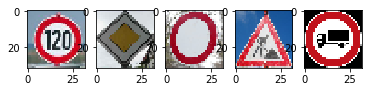

In [33]:
# Let's plot all our images
fig, axs =  plt.subplots(1, len(new_imgs))
for i in range(0, new_imgs.shape[0]):
    axs[i].imshow(new_imgs[i], cmap=None)
plt.show()

### Predict the Sign Type for Each Image

In [34]:
# First we must create labels for our new images
new_img_lbs = np.array([8, 12, 15, 25, 10])

In [35]:
preds = me_c_sample_3x3.predict(new_imgs)

### Analyze Prediction Performance

#### Calculating accuracy

In [36]:
new_img_pred_acc = np.sum(new_img_lbs == preds) / len(preds)
print("Predictional accuracy on new images: {0}%".format(new_img_pred_acc * 100))

Predictional accuracy on new images: 0.0%


In [37]:
new_imgs_normalised = normalise_images(new_imgs, X_train)
preds_normalised = me_c_sample_3x3.predict(new_imgs)

In [38]:
new_img_norm_pred_acc = np.sum(new_img_lbs == preds_normalised) / len(preds_normalised)
print("[Normalised] Predictional accuracy on new images: {0}%".format(new_img_norm_pred_acc * 100))

[Normalised] Predictional accuracy on new images: 0.0%


#### Calculating Top 5 Softmax Probabilities

In [39]:
new_imgs_top5_probs = me_c_sample_3x3.predict(new_imgs, top_5=True)
new_imgs_normalised_top5_probs = me_c_sample_3x3.predict(new_imgs_normalised, top_5=True)

In [74]:
def class_ids_to_labels(cids):
    return list(map(lambda cid: sign_names[sign_names["ClassId"] == cid] ["SignName"].values[0],  cids))

In [77]:
new_img_lbs_names = class_ids_to_labels(new_img_lbs)

In [78]:
softmax_lbs_names = list(map(lambda cids: class_ids_to_labels(cids), new_imgs_top5_probs.indices))

In [87]:
softmax_and_labels = (list(zip(new_imgs_top5_probs.values, softmax_lbs_names)))

In [131]:
new_imgs_top5_probs.values[0]

array([  9.76169944e-01,   1.55733321e-02,   8.25265516e-03,
         4.09932545e-06,   4.18222471e-11], dtype=float32)

In [132]:
new_imgs_top5_probs.indices[0]

array([11, 30,  6,  9,  0], dtype=int32)

In [127]:
softmax_and_labels[0]

(array([  9.76169944e-01,   1.55733321e-02,   8.25265516e-03,
          4.09932545e-06,   4.18222471e-11], dtype=float32),
 ['Right-of-way at the next intersection',
  'Beware of ice/snow',
  'End of speed limit (80km/h)',
  'No passing',
  'Speed limit (20km/h)'])

In [128]:
new_img_lbs_names[0]

'Speed limit (120km/h)'

In [124]:
def show_img_softmax_probs(img, softmax_probs_lb_names, correct_lb):
    fg, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
    ax[0].imshow(img)
    
    lb_names = softmax_probs_lb_names[1]
    y_pos = np.arange(len(lb_names))
    vals = softmax_probs_lb_names[0]
    for i in range(0, len(lb_names)):
        c = "g" if lb_names[i] == correct_lb else "r"
        ax[1].barh(i, vals[i], color=c, label="{0}".format(lb_names[i]))

    ax[1].set_yticks(y_pos)
    ax[1].set_yticklabels(lb_names)
    ax[1].invert_yaxis()  # labels read top-to-bottom
    ax[1].set_xlabel('Class')
    ax[1].set_title('Softmax')  
    ax[1].set_xscale('log')
    
    ax[1].legend(loc='best')
    
    plt.show()

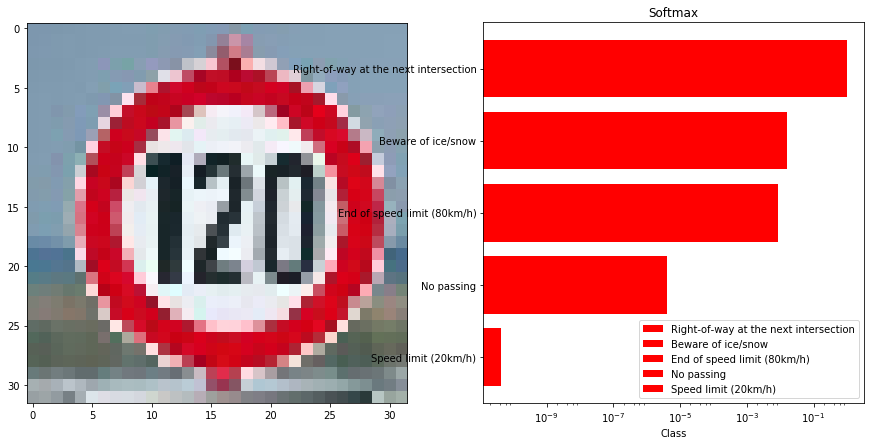

In [126]:
show_img_softmax_probs(new_imgs[0], softmax_and_labels[0], new_img_lbs_names[0])

In [35]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [36]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [37]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [38]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")